In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("AdCampaignAnalysis") \
    .getOrCreate()

raw_data = spark.read.csv("data/ad_campaign_data.csv", header=True, inferSchema=True)

raw_data.show(5)
raw_data.printSchema()


+-------+---+------+--------+-----------+------+-----------+-----------+------+-----------+-------------------+----------------------+--------------------------+-------------------+------------------+-------+------------------+------------------+-------+-------+------------------+-------+-------+------------------+--------+--------+--------+--------+--------+--------+------------------+--------+------------------+--------+------------------+
|user_id|age|gender|location|device_type| ad_id|ad_category|impressions|clicks|conversions|engagement_duration|interaction_timestamps|previous_interaction_score|    sentiment_score|           tfidf_0|tfidf_1|           tfidf_2|           tfidf_3|tfidf_4|tfidf_5|           tfidf_6|tfidf_7|tfidf_8|           tfidf_9|tfidf_10|tfidf_11|tfidf_12|tfidf_13|tfidf_14|tfidf_15|          tfidf_16|tfidf_17|          tfidf_18|tfidf_19|          tfidf_20|
+-------+---+------+--------+-----------+------+-----------+-----------+------+-----------+-----------------

In [4]:
cleaned_data = raw_data.dropna()

cleaned_data = cleaned_data.withColumn("user_id", col("user_id").cast("int")) \
                           .withColumn("ad_id", col("ad_id").cast("int")) \
                           .withColumn("impressions", col("impressions").cast("int")) \
                           .withColumn("clicks", col("clicks").cast("int")) \
                           .withColumn("engagement_duration", col("engagement_duration").cast("float"))

cleaned_data.show(5)


+-------+---+------+--------+-----------+-----+-----------+-----------+------+-----------+-------------------+----------------------+--------------------------+-------------------+------------------+-------+------------------+------------------+-------+-------+------------------+-------+-------+------------------+--------+--------+--------+--------+--------+--------+------------------+--------+------------------+--------+------------------+
|user_id|age|gender|location|device_type|ad_id|ad_category|impressions|clicks|conversions|engagement_duration|interaction_timestamps|previous_interaction_score|    sentiment_score|           tfidf_0|tfidf_1|           tfidf_2|           tfidf_3|tfidf_4|tfidf_5|           tfidf_6|tfidf_7|tfidf_8|           tfidf_9|tfidf_10|tfidf_11|tfidf_12|tfidf_13|tfidf_14|tfidf_15|          tfidf_16|tfidf_17|          tfidf_18|tfidf_19|          tfidf_20|
+-------+---+------+--------+-----------+-----+-----------+-----------+------+-----------+-------------------+

In [6]:
from pyspark.ml.feature import VectorAssembler

cleaned_data_non_null = cleaned_data.dropna()

feature_columns = ["age", "gender", "location", "device_type", 
                   "ad_id", "ad_category", "impressions", "clicks", 
                   "conversions", "engagement_duration", "previous_interaction_score", 
                   "sentiment_score"]

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
processed_data = assembler.transform(cleaned_data_non_null)

processed_data.show(5)


+-------+---+------+--------+-----------+-----+-----------+-----------+------+-----------+-------------------+----------------------+--------------------------+---------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|user_id|age|gender|location|device_type|ad_id|ad_category|impressions|clicks|conversions|engagement_duration|interaction_timestamps|previous_interaction_score|sentiment_score|tfidf_0|tfidf_1|tfidf_2|tfidf_3|tfidf_4|tfidf_5|tfidf_6|tfidf_7|tfidf_8|tfidf_9|tfidf_10|tfidf_11|tfidf_12|tfidf_13|tfidf_14|tfidf_15|tfidf_16|tfidf_17|tfidf_18|tfidf_19|tfidf_20|features|
+-------+---+------+--------+-----------+-----+-----------+-----------+------+-----------+-------------------+----------------------+--------------------------+---------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+-----

In [9]:
processed_data.select('features').show()


+--------+
|features|
+--------+
+--------+



+-------+---+------+--------+-----------+------+-----------+-----------+------+-----------+-------------------+----------------------+--------------------------+-------------------+------------------+-------+------------------+------------------+-------+-------+------------------+-------+-------+------------------+--------+--------+--------+--------+--------+--------+------------------+--------+------------------+--------+------------------+
|user_id|age|gender|location|device_type| ad_id|ad_category|impressions|clicks|conversions|engagement_duration|interaction_timestamps|previous_interaction_score|    sentiment_score|           tfidf_0|tfidf_1|           tfidf_2|           tfidf_3|tfidf_4|tfidf_5|           tfidf_6|tfidf_7|tfidf_8|           tfidf_9|tfidf_10|tfidf_11|tfidf_12|tfidf_13|tfidf_14|tfidf_15|          tfidf_16|tfidf_17|          tfidf_18|tfidf_19|          tfidf_20|
+-------+---+------+--------+-----------+------+-----------+-----------+------+-----------+-----------------

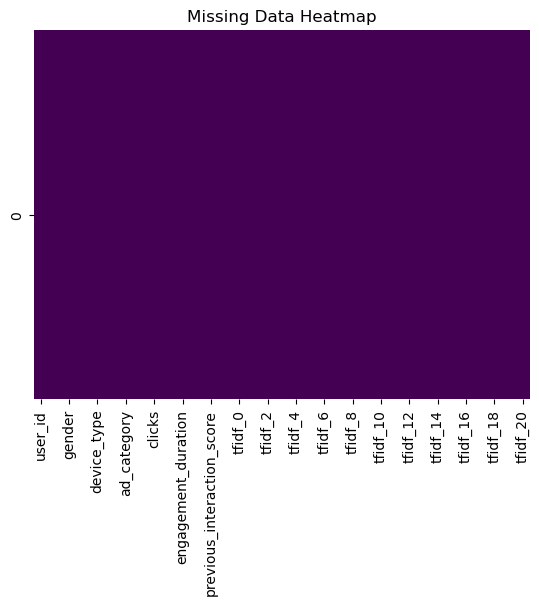

root
 |-- user_id: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- location: integer (nullable = true)
 |-- device_type: integer (nullable = true)
 |-- ad_id: string (nullable = true)
 |-- ad_category: integer (nullable = true)
 |-- impressions: integer (nullable = true)
 |-- clicks: integer (nullable = true)
 |-- conversions: integer (nullable = true)
 |-- engagement_duration: double (nullable = true)
 |-- interaction_timestamps: timestamp (nullable = true)
 |-- previous_interaction_score: double (nullable = true)
 |-- sentiment_score: double (nullable = true)
 |-- tfidf_0: double (nullable = true)
 |-- tfidf_1: double (nullable = true)
 |-- tfidf_2: double (nullable = true)
 |-- tfidf_3: double (nullable = true)
 |-- tfidf_4: double (nullable = true)
 |-- tfidf_5: double (nullable = true)
 |-- tfidf_6: double (nullable = true)
 |-- tfidf_7: double (nullable = true)
 |-- tfidf_8: double (nullable = true)
 |-- tfidf_9: double (nu

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, when, isnull
import matplotlib.pyplot as plt
import seaborn as sns

spark = SparkSession.builder.appName("DataProcessingPipeline").getOrCreate()

df = spark.read.csv('data/ad_campaign_data.csv', header=True, inferSchema=True)

df.show(5)

df.describe().show()

missing_data = df.select([(count(when(isnull(c), c)).alias(c)) for c in df.columns])
missing_data.show()

missing_data_pandas = missing_data.toPandas()

sns.heatmap(missing_data_pandas.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

df.printSchema()


+-------+---+------+--------+-----------+------+-----------+-----------+------+-----------+-------------------+----------------------+--------------------------+-------------------+------------------+-------+------------------+------------------+-------+-------+------------------+-------+-------+------------------+--------+--------+--------+--------+--------+--------+------------------+--------+------------------+--------+------------------+
|user_id|age|gender|location|device_type| ad_id|ad_category|impressions|clicks|conversions|engagement_duration|interaction_timestamps|previous_interaction_score|    sentiment_score|           tfidf_0|tfidf_1|           tfidf_2|           tfidf_3|tfidf_4|tfidf_5|           tfidf_6|tfidf_7|tfidf_8|           tfidf_9|tfidf_10|tfidf_11|tfidf_12|tfidf_13|tfidf_14|tfidf_15|          tfidf_16|tfidf_17|          tfidf_18|tfidf_19|          tfidf_20|
+-------+---+------+--------+-----------+------+-----------+-----------+------+-----------+-----------------

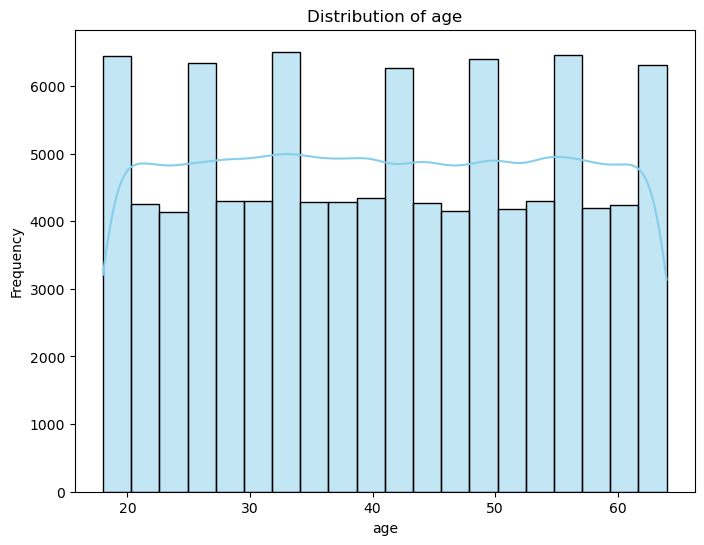

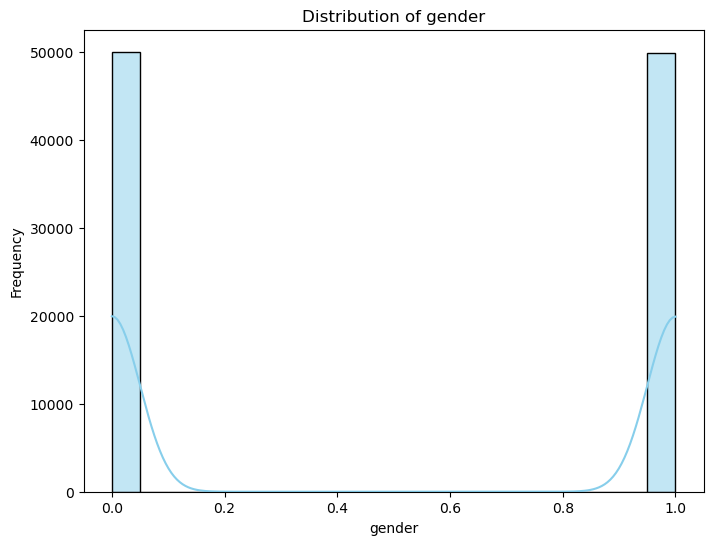

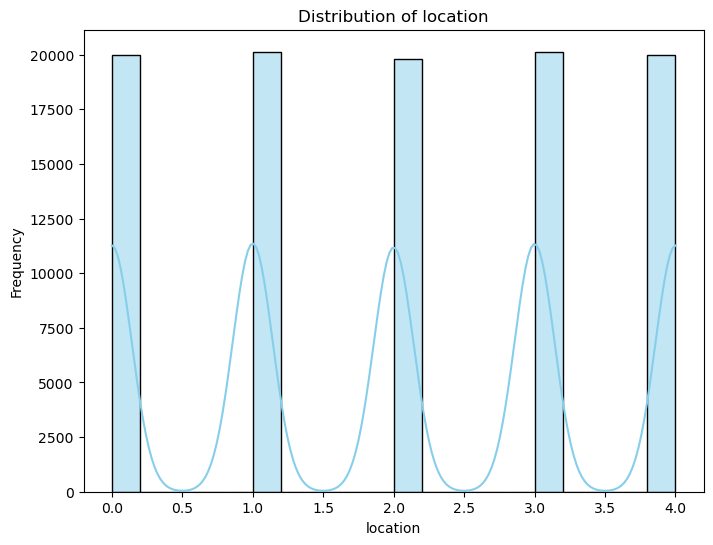

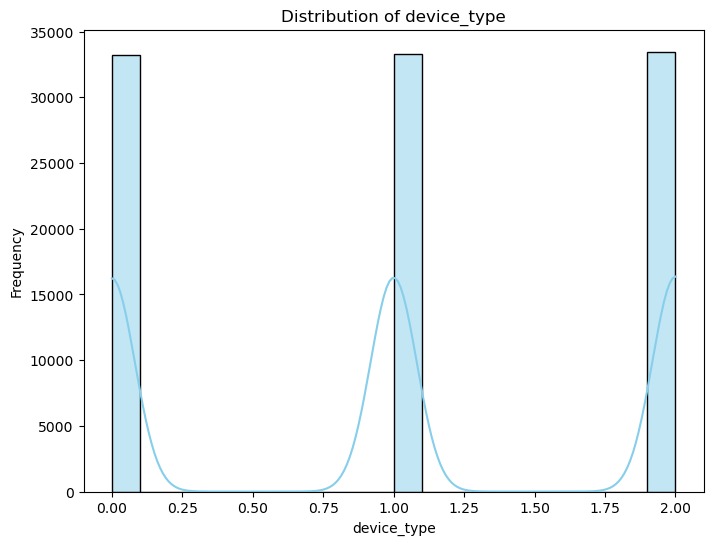

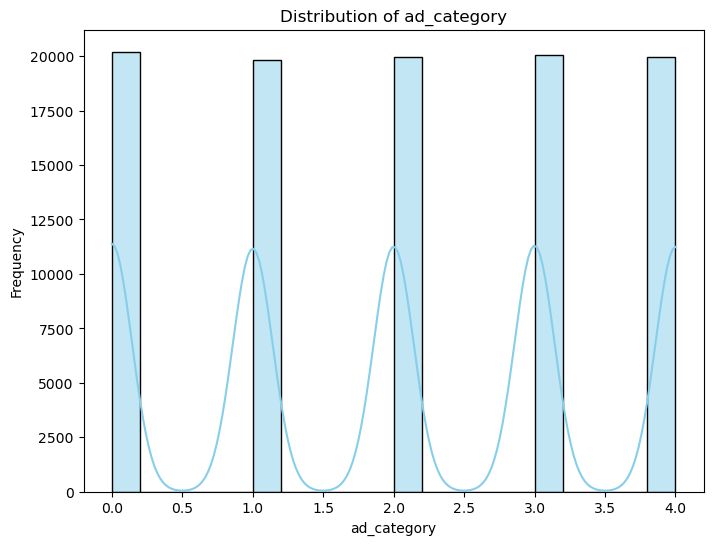

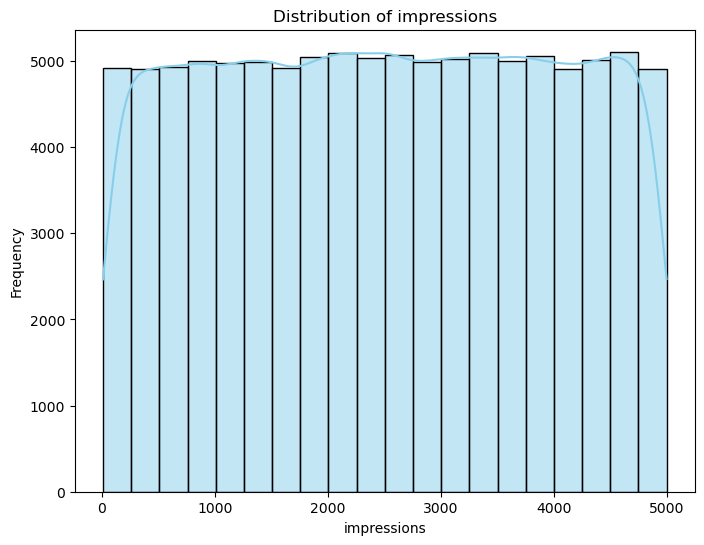

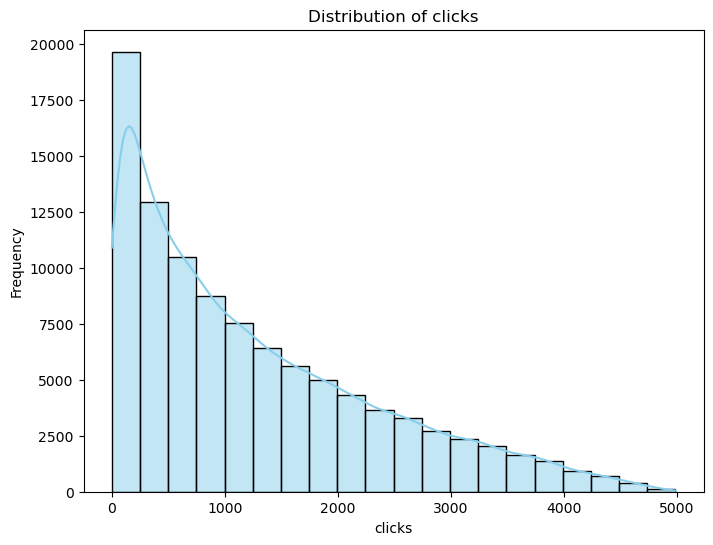

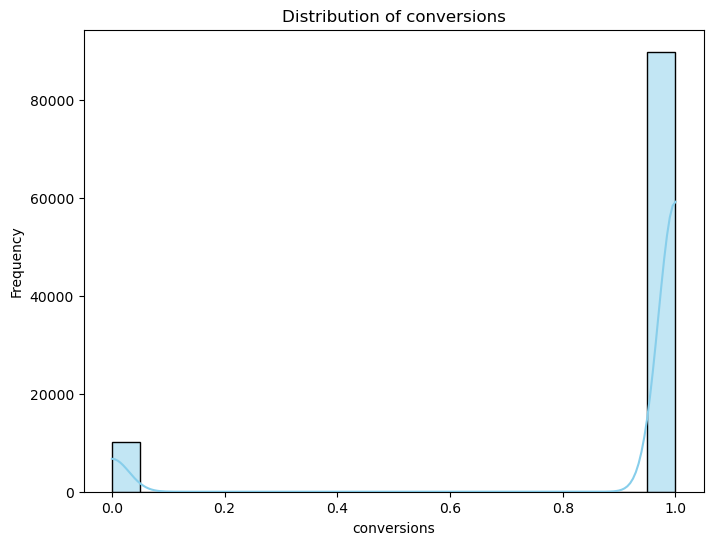

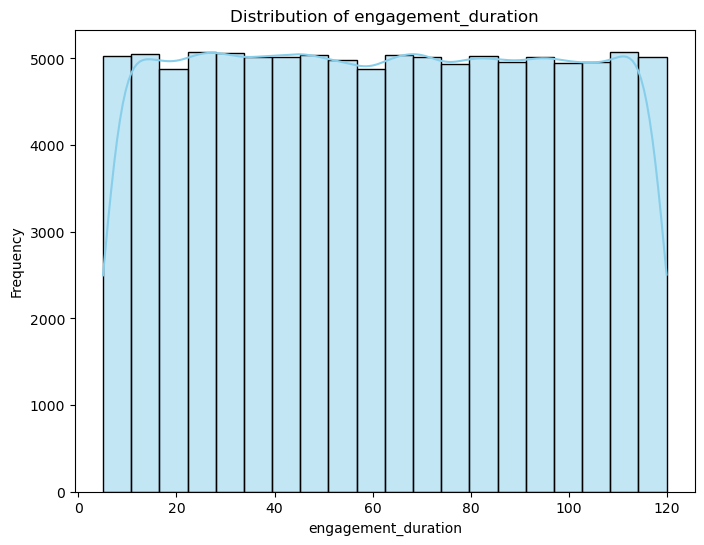

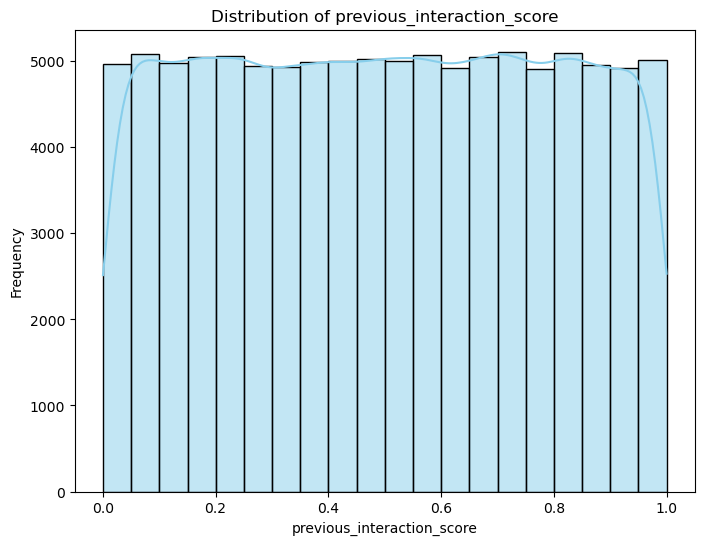

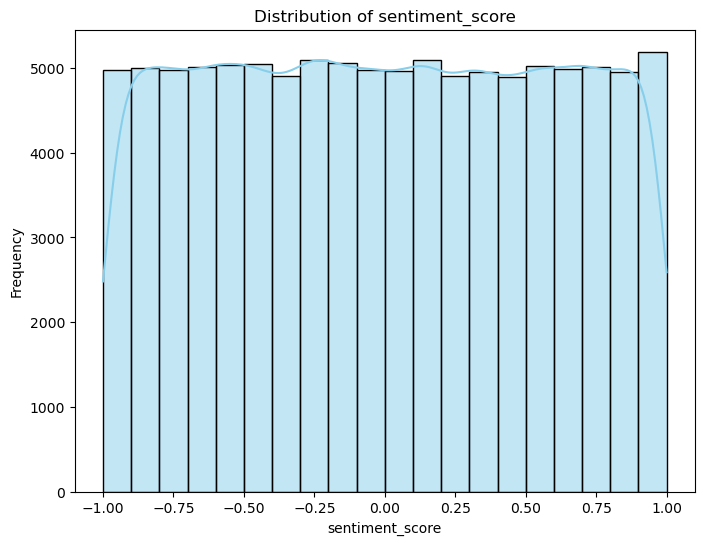

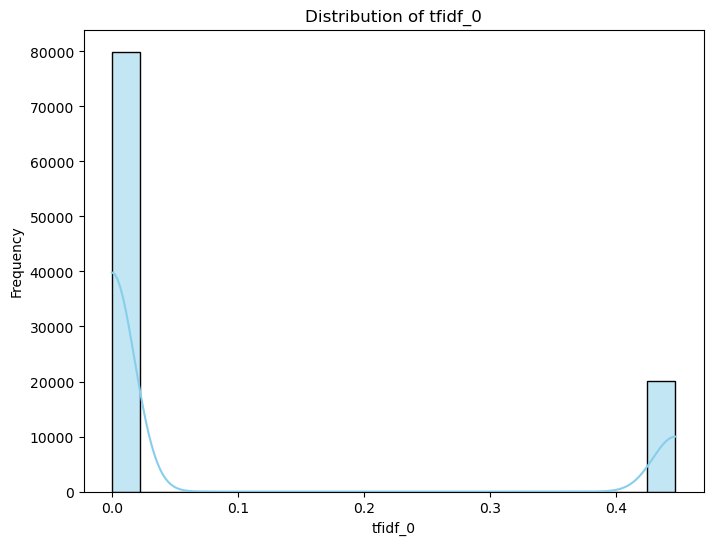

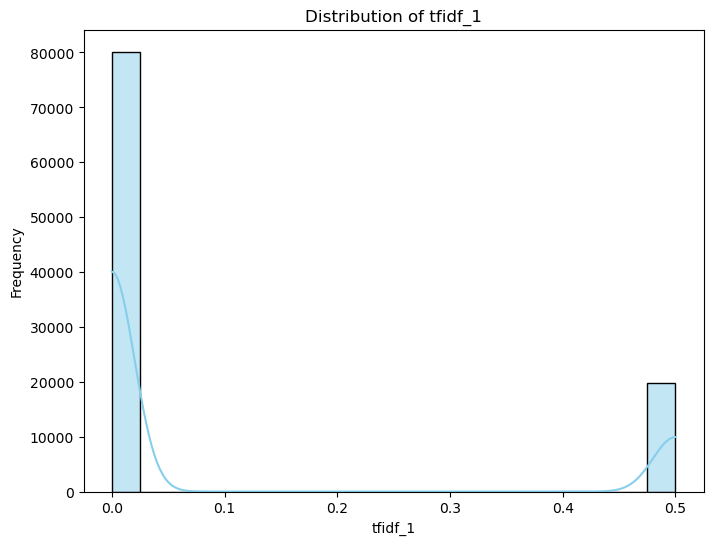

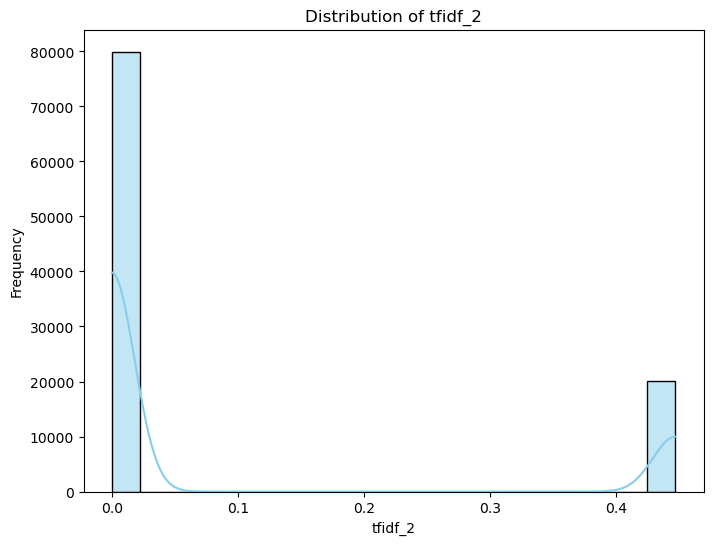

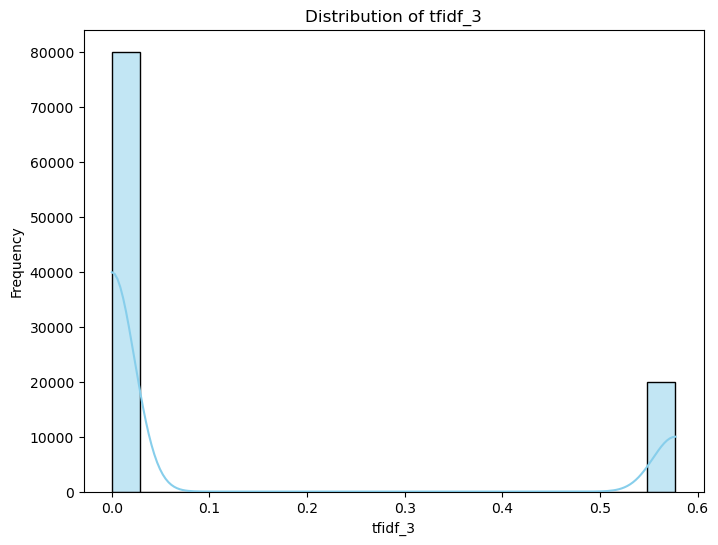

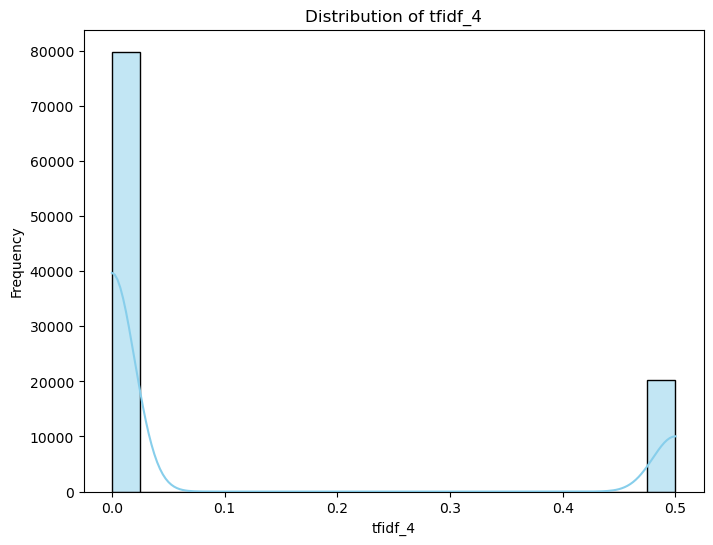

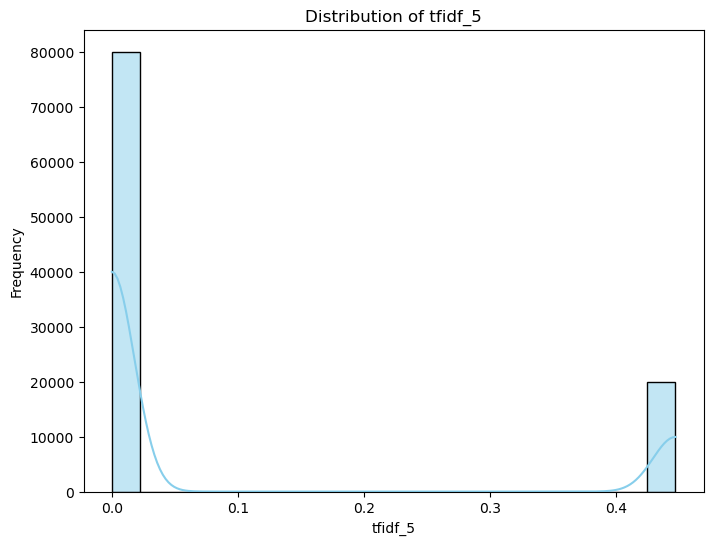

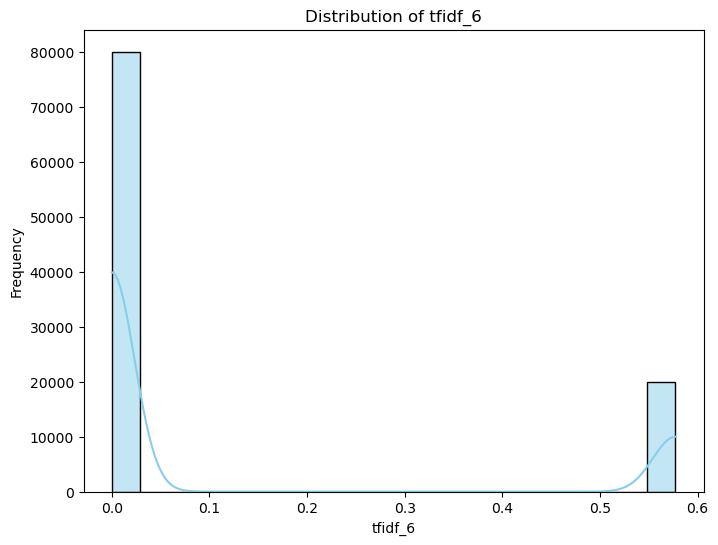

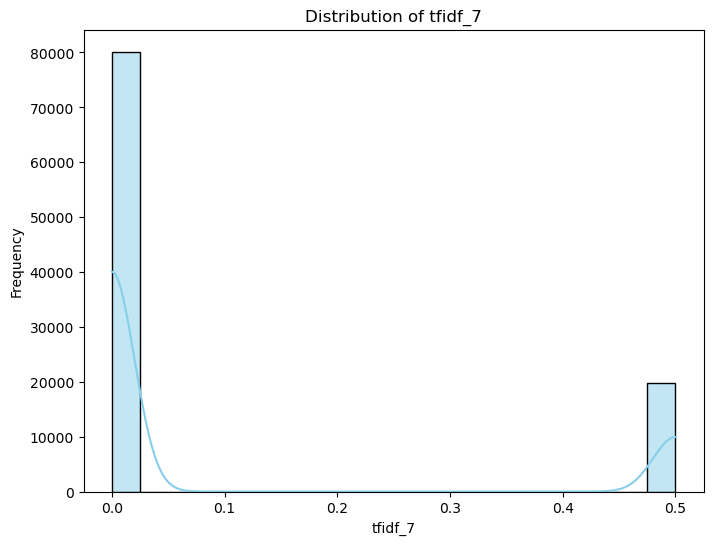

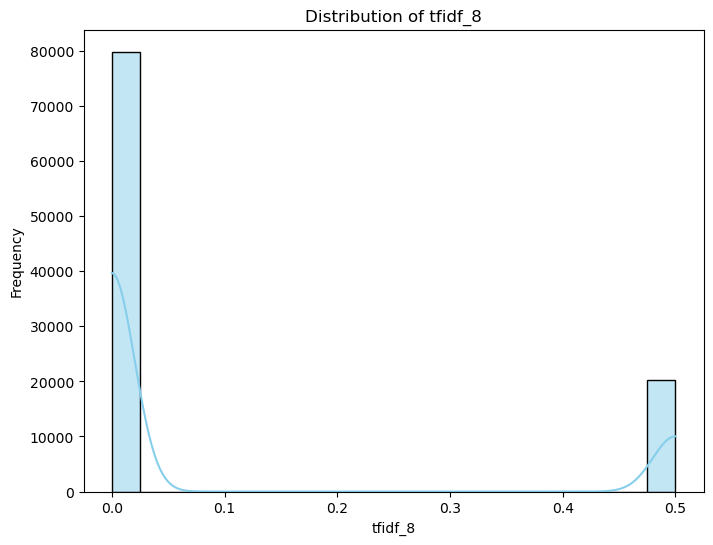

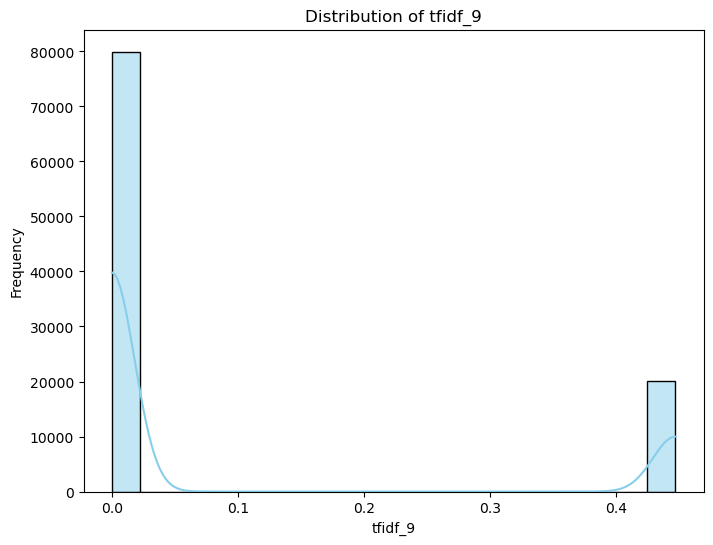

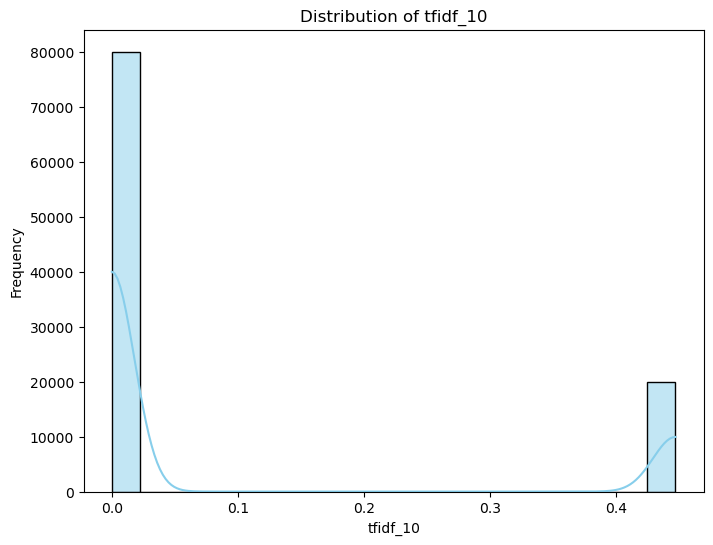

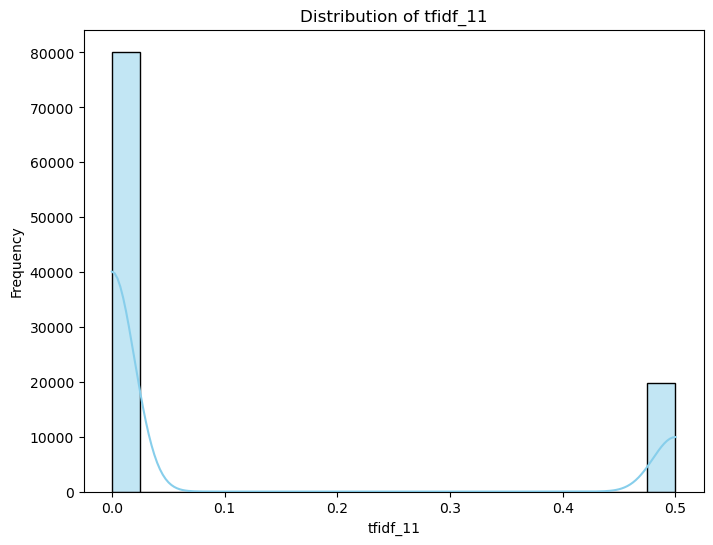

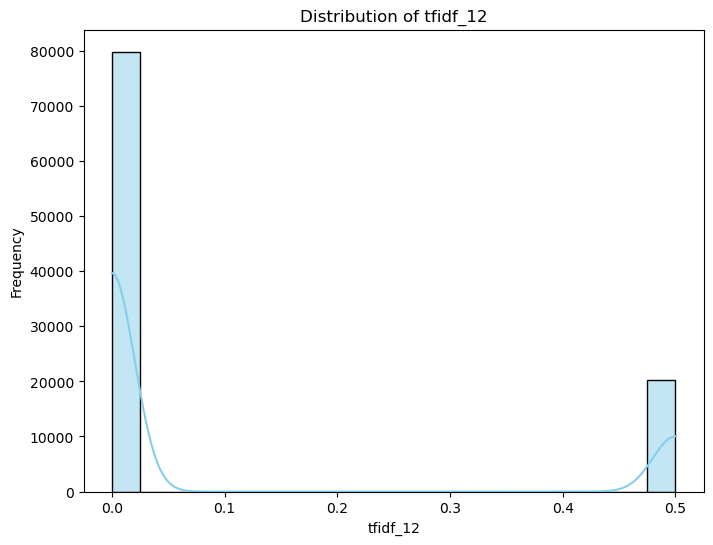

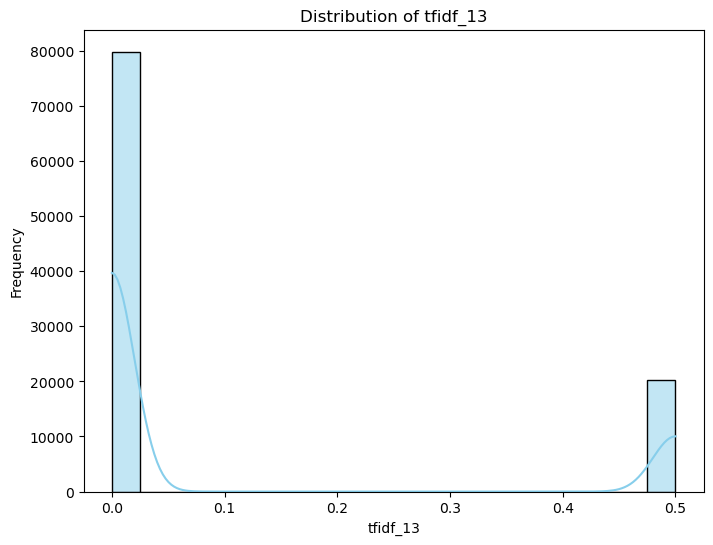

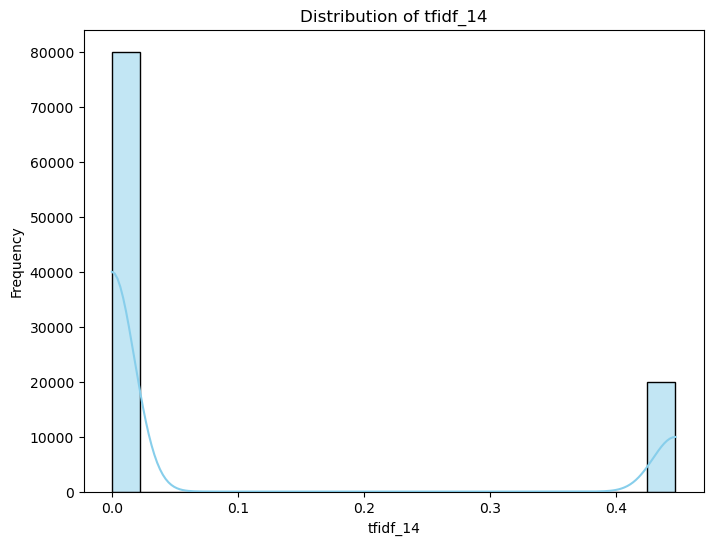

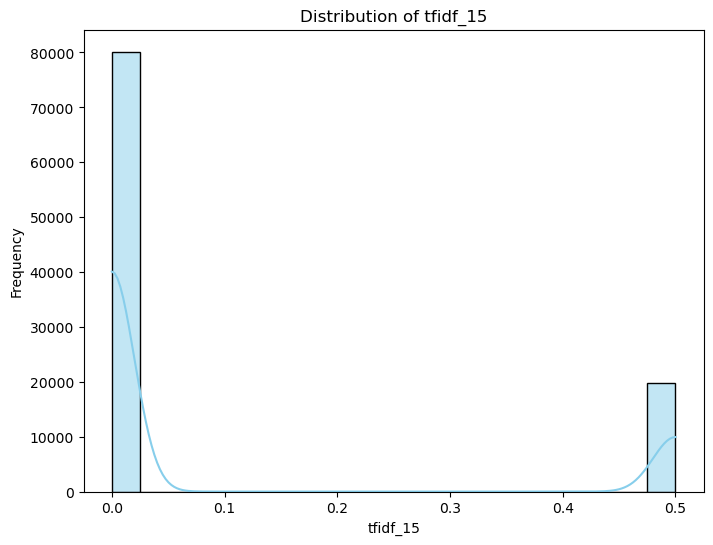

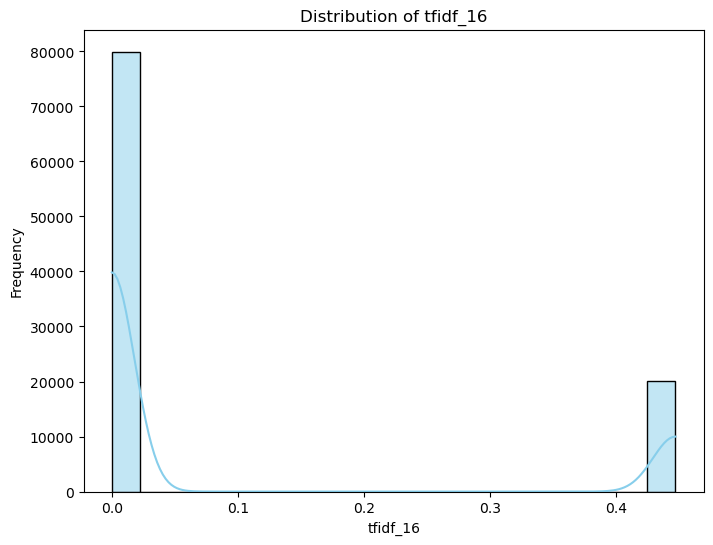

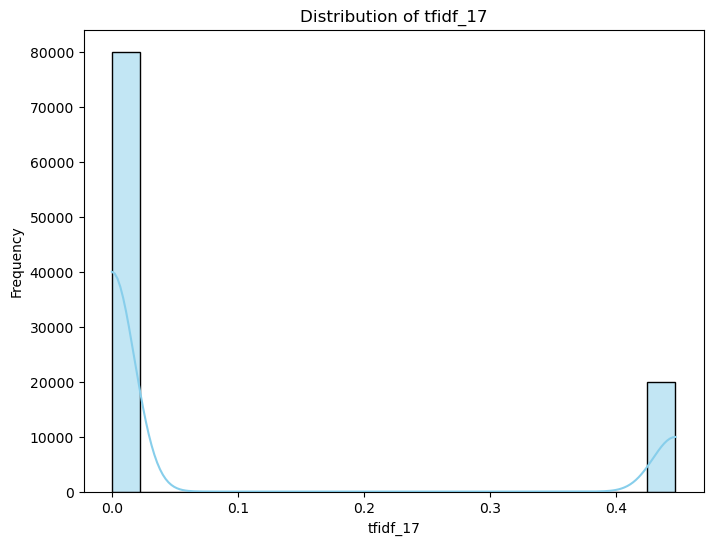

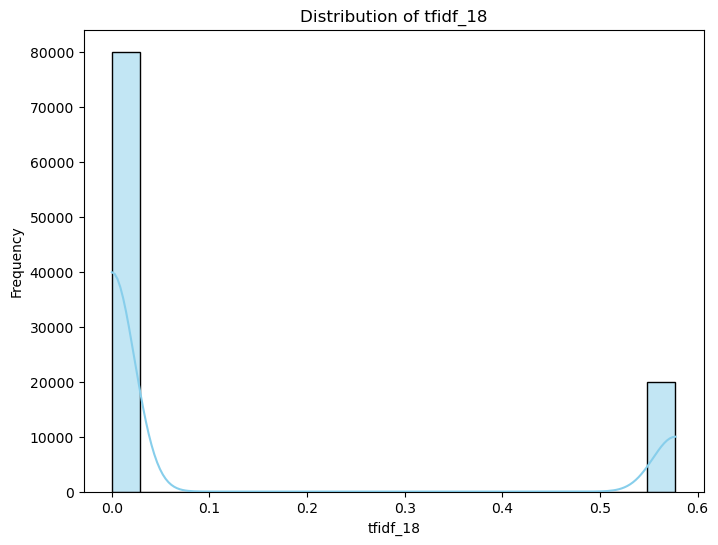

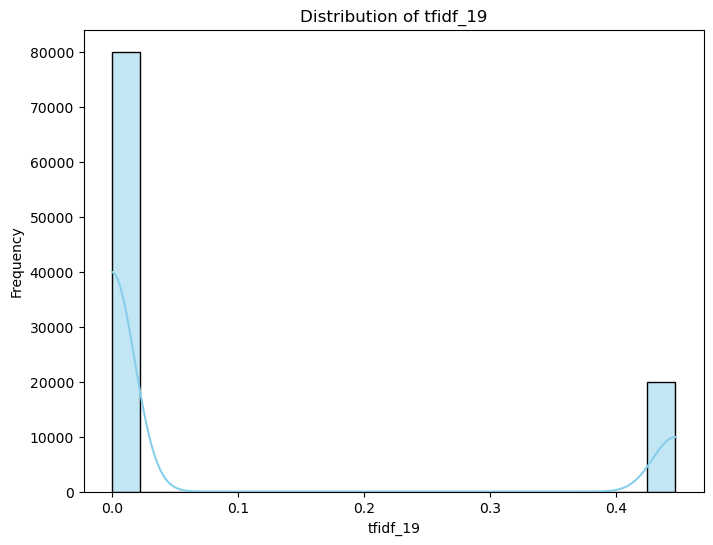

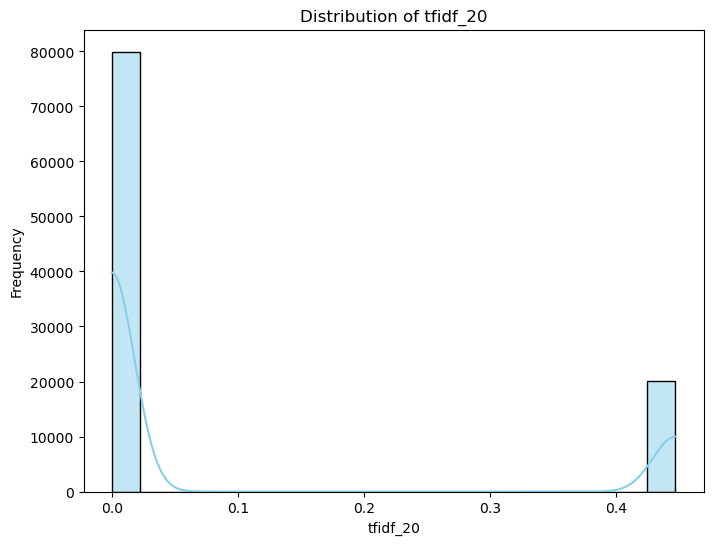

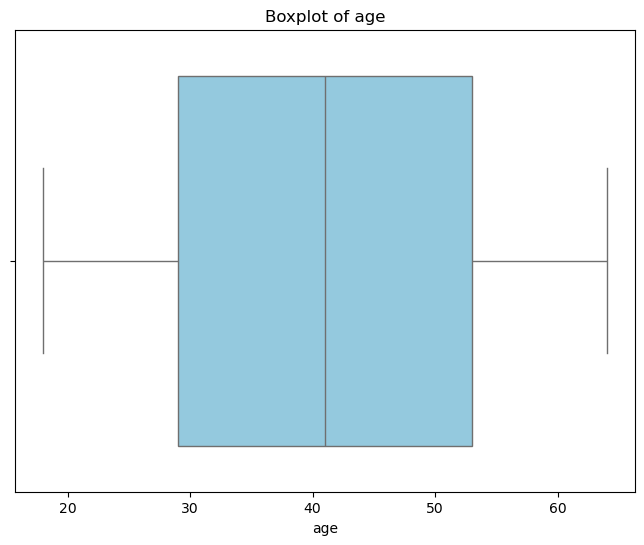

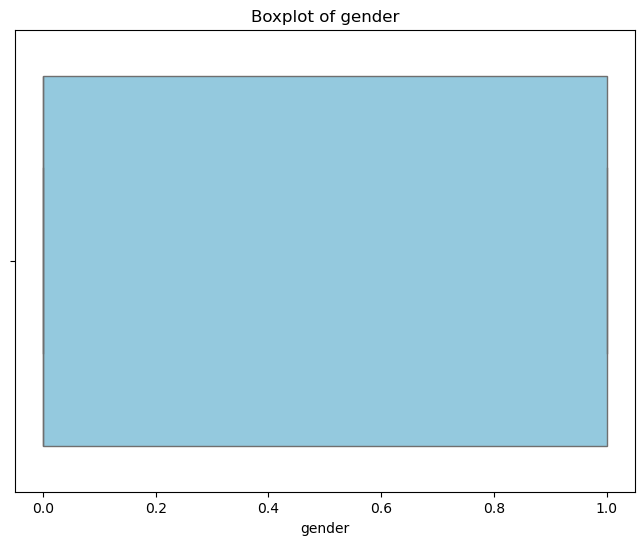

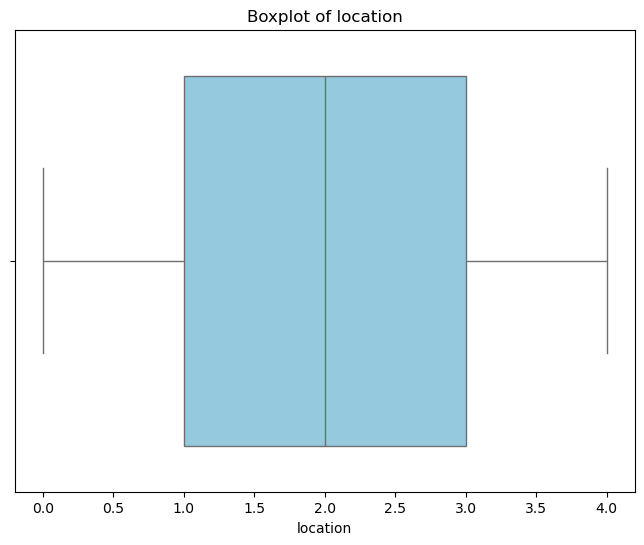

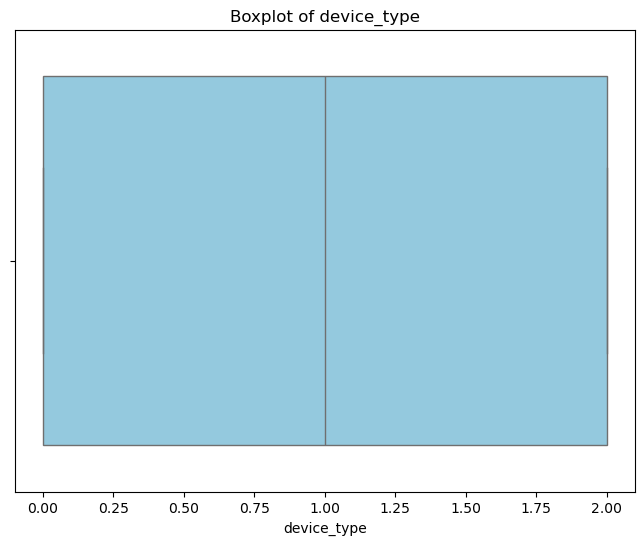

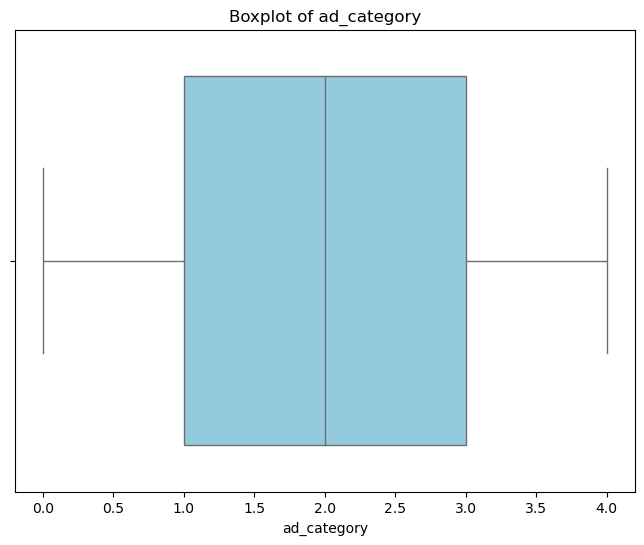

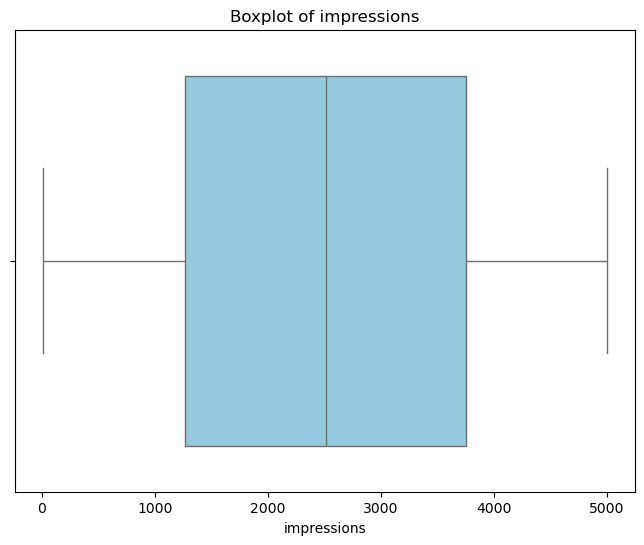

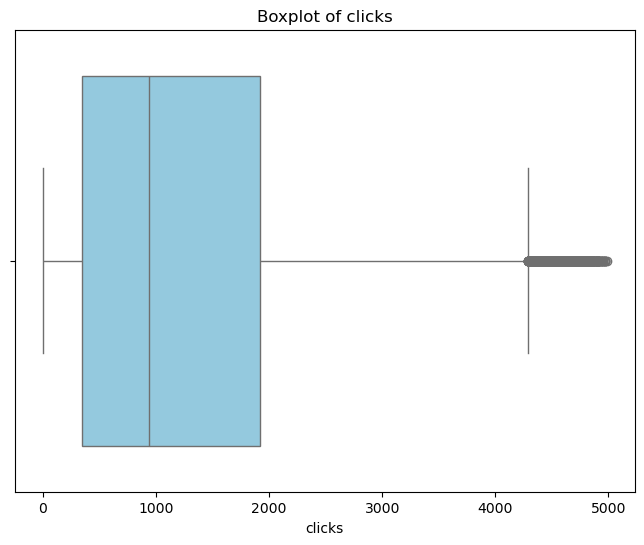

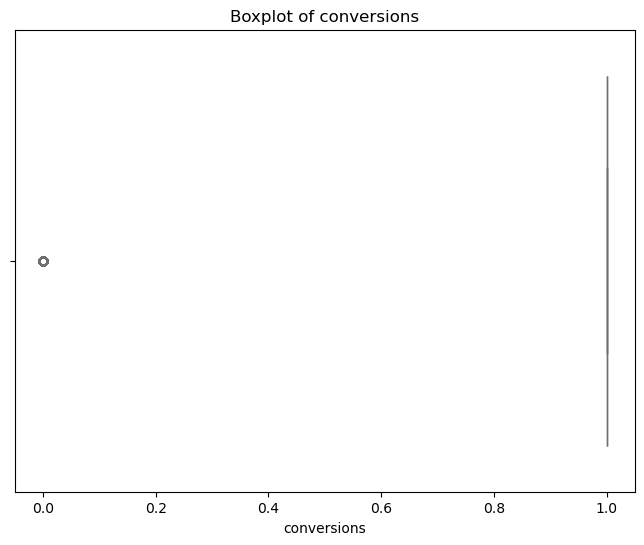

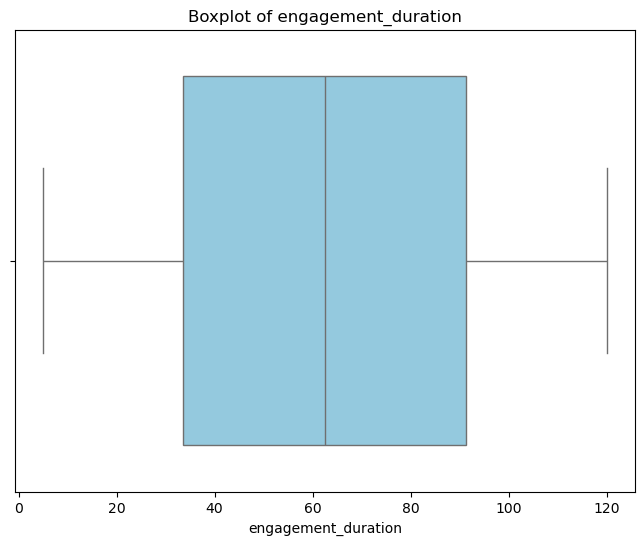

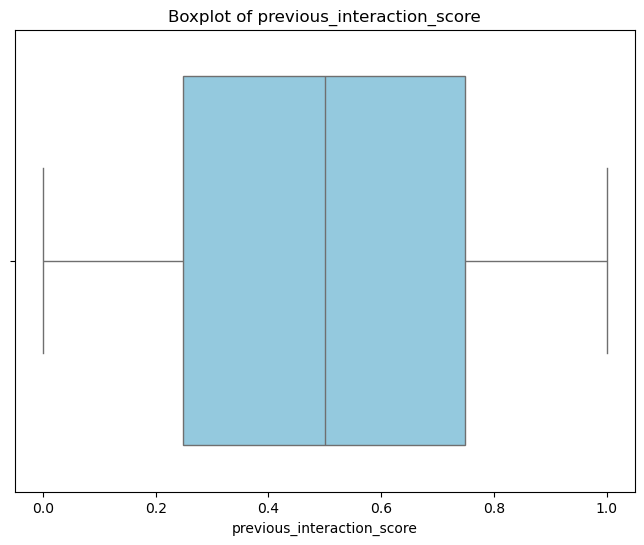

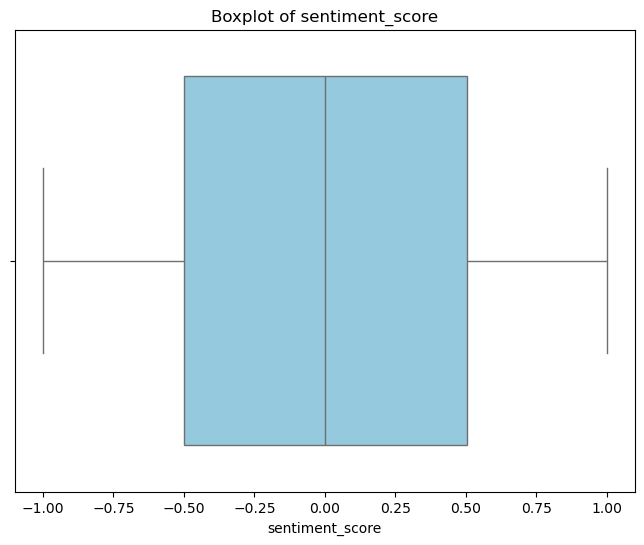

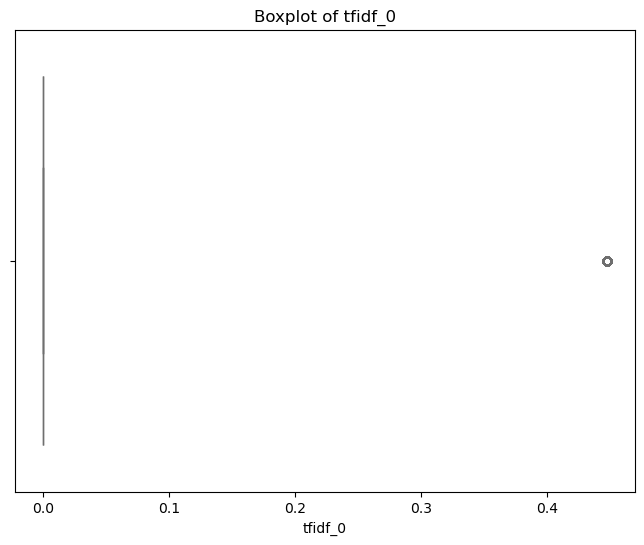

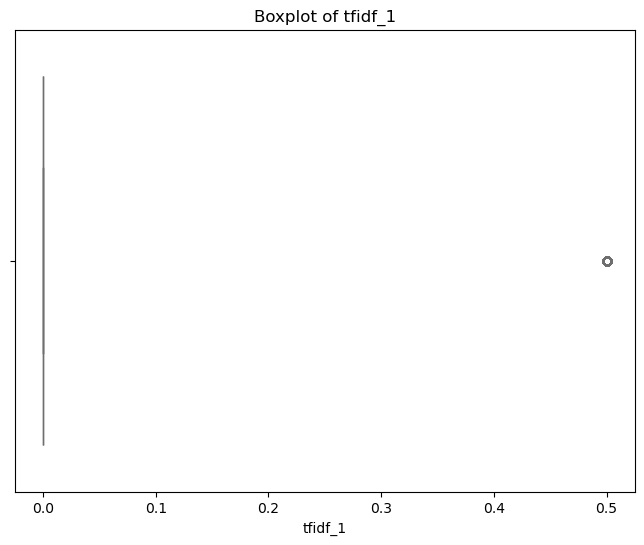

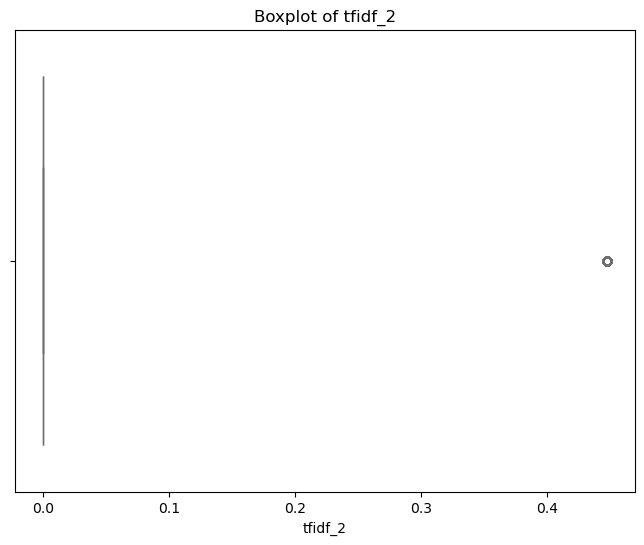

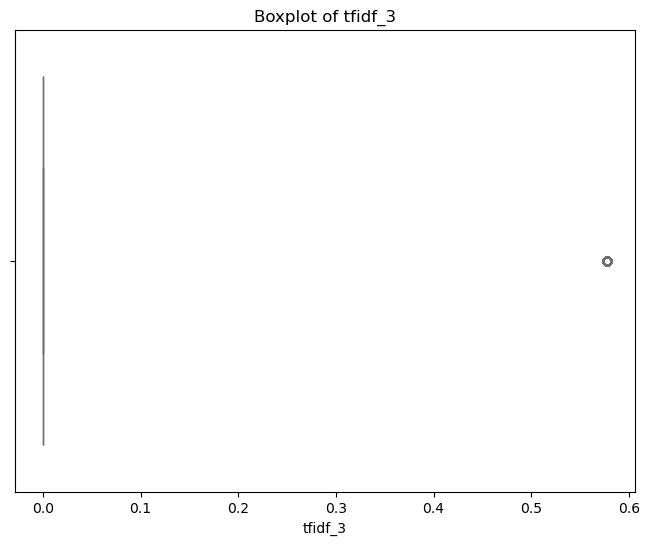

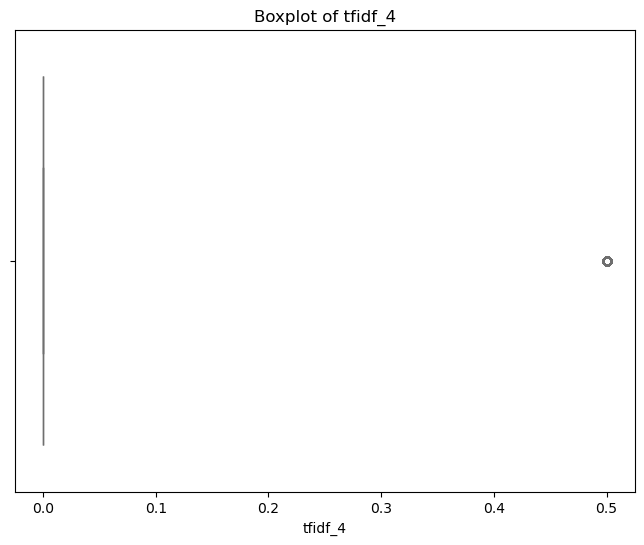

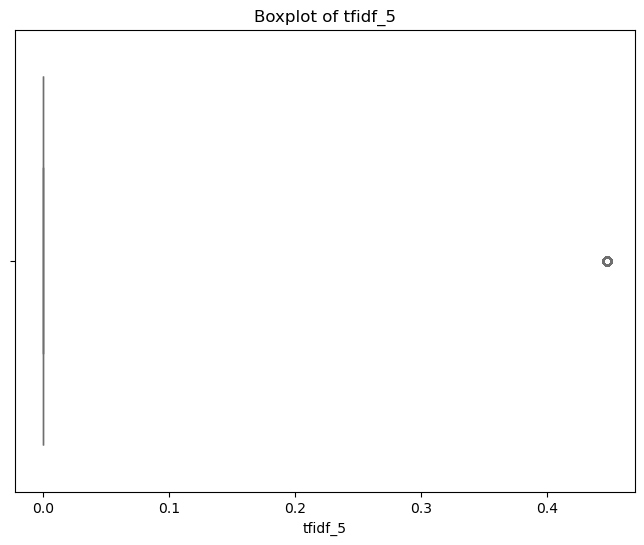

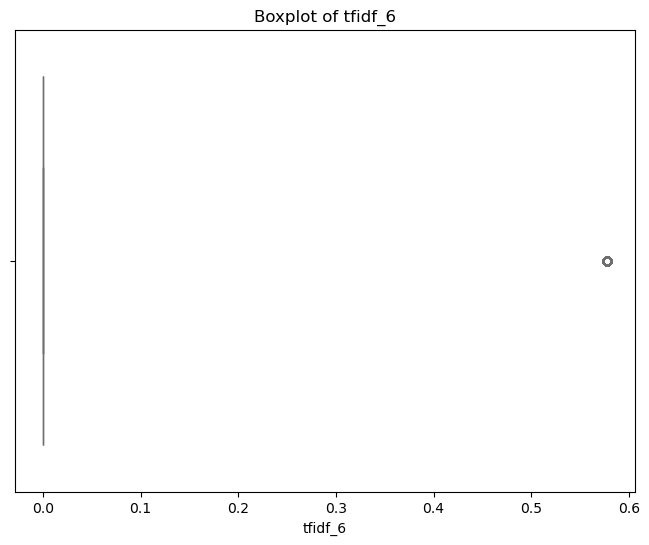

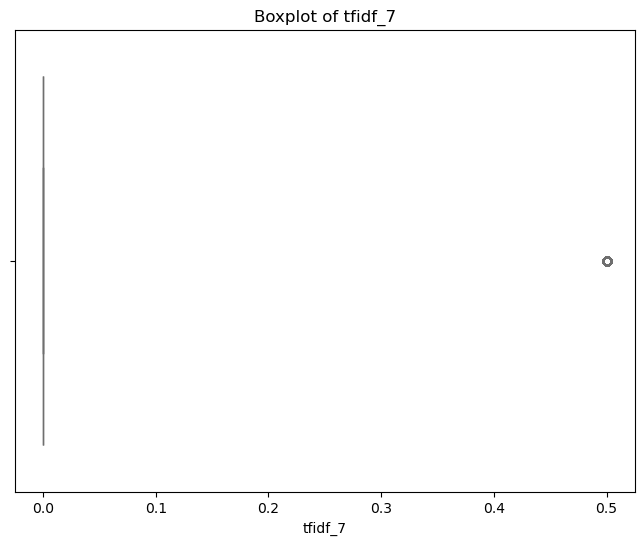

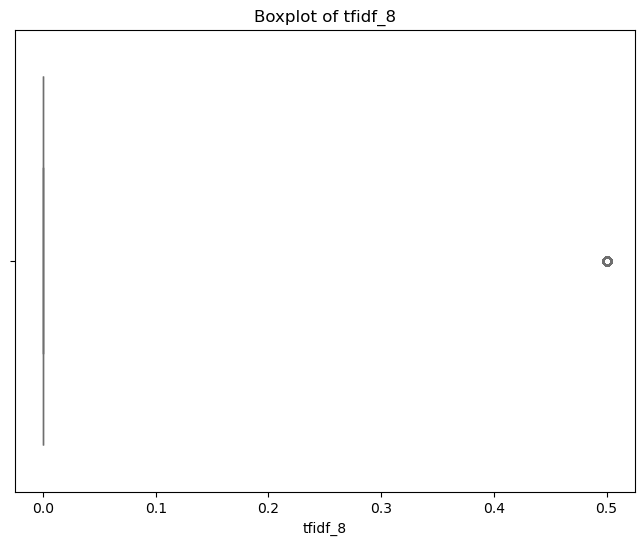

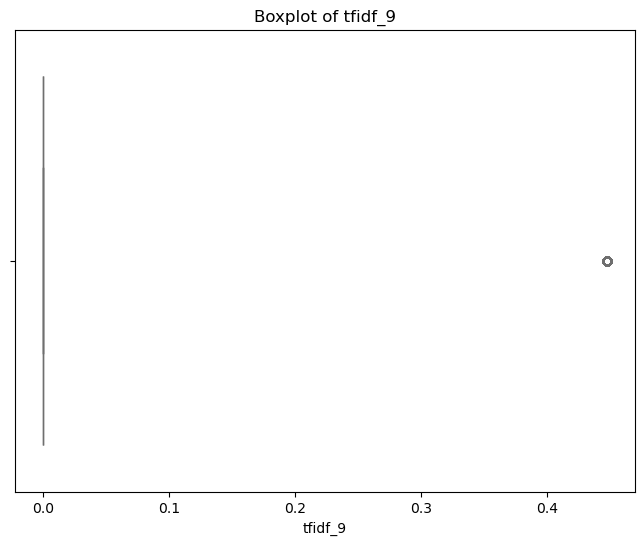

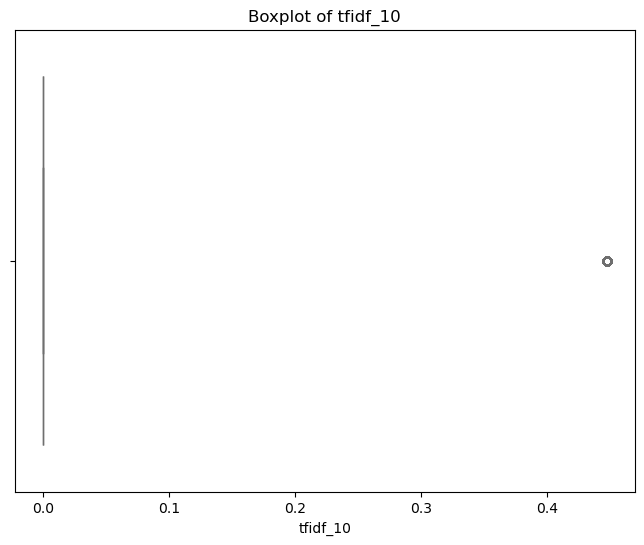

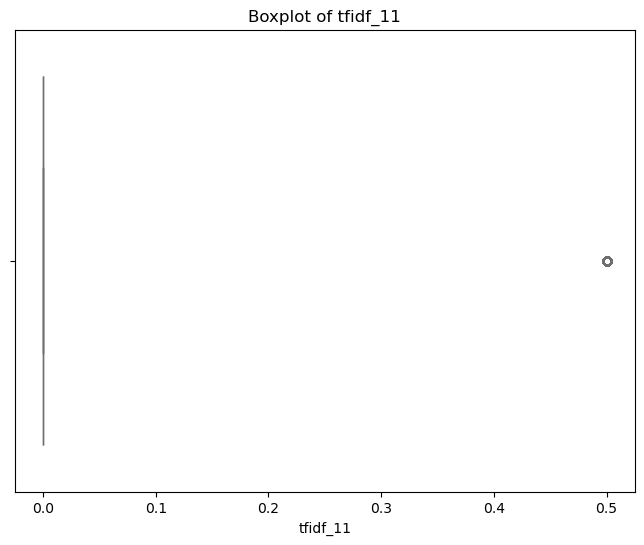

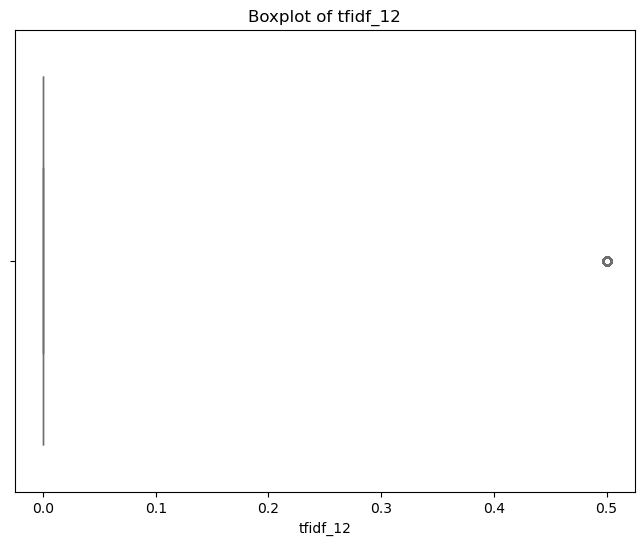

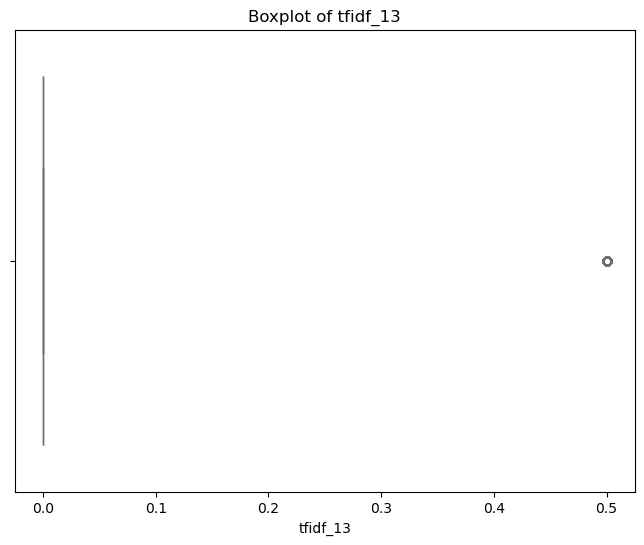

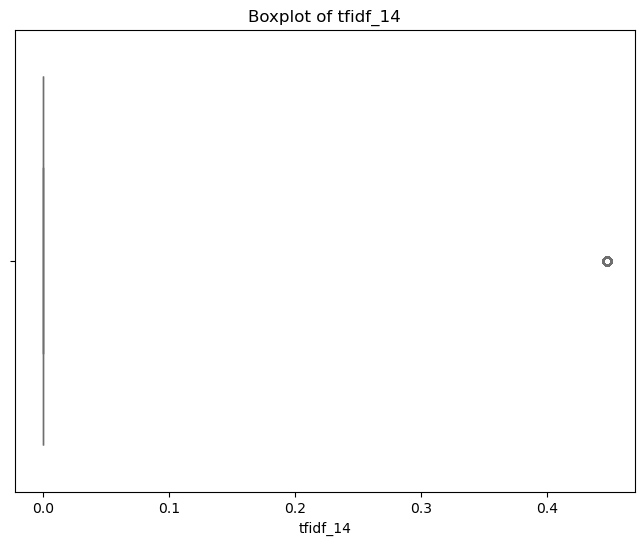

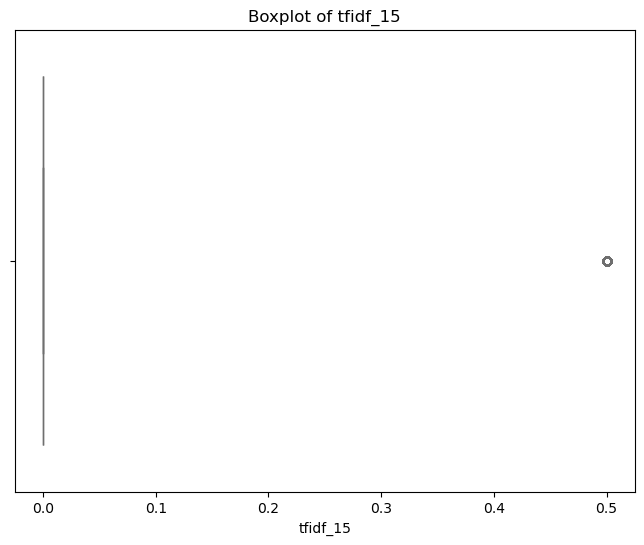

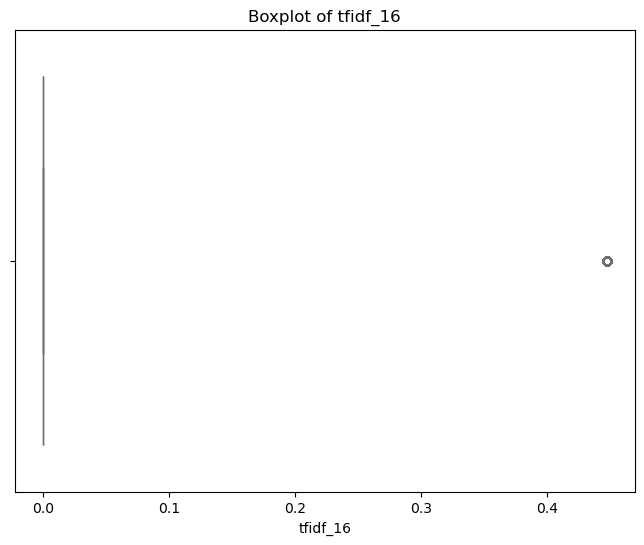

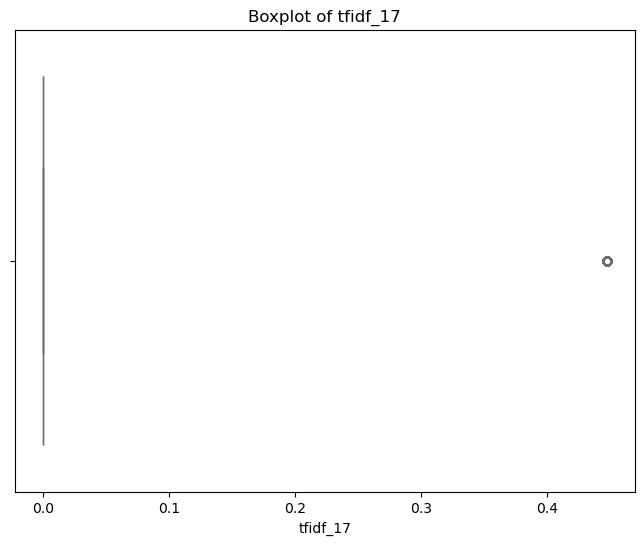

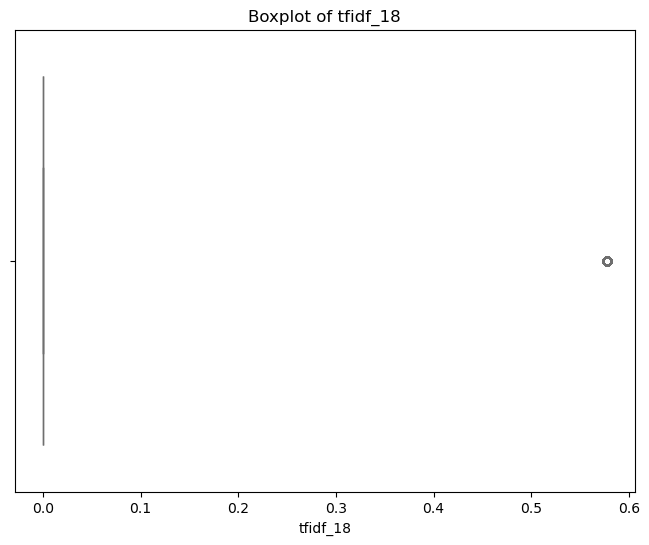

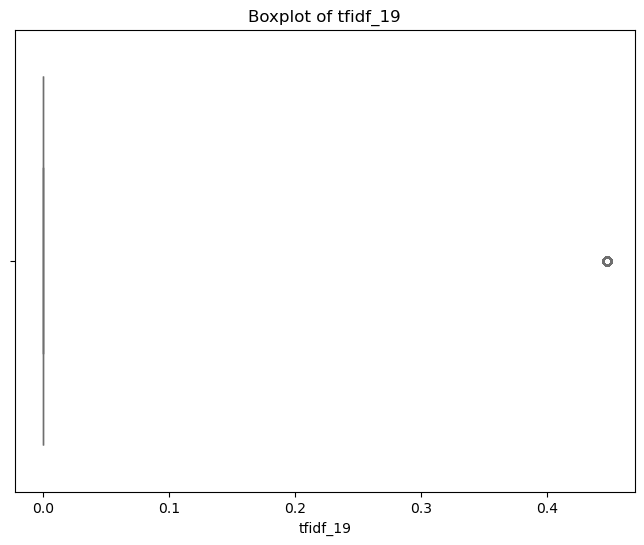

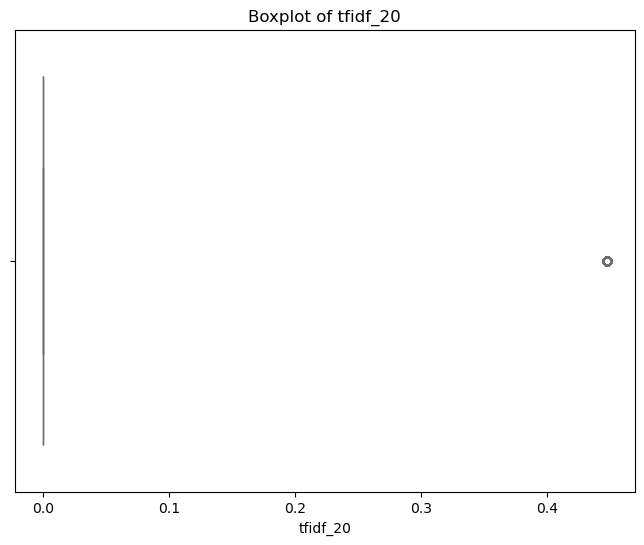

+-------+---+------+--------+-----------+------+-----------+-----------+------+-----------+-------------------+----------------------+--------------------------+-------------------+-------+-------+-------+------------------+-------+------------------+------------------+-------+-------+-------+------------------+--------+--------+--------+------------------+--------+--------+------------------+------------------+------------------+--------+
|user_id|age|gender|location|device_type| ad_id|ad_category|impressions|clicks|conversions|engagement_duration|interaction_timestamps|previous_interaction_score|    sentiment_score|tfidf_0|tfidf_1|tfidf_2|           tfidf_3|tfidf_4|           tfidf_5|           tfidf_6|tfidf_7|tfidf_8|tfidf_9|          tfidf_10|tfidf_11|tfidf_12|tfidf_13|          tfidf_14|tfidf_15|tfidf_16|          tfidf_17|          tfidf_18|          tfidf_19|tfidf_20|
+-------+---+------+--------+-----------+------+-----------+-----------+------+-----------+-------------------+-

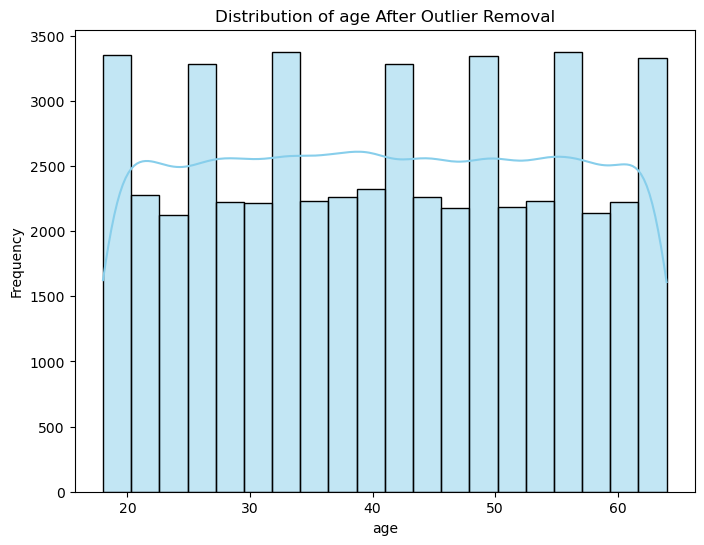

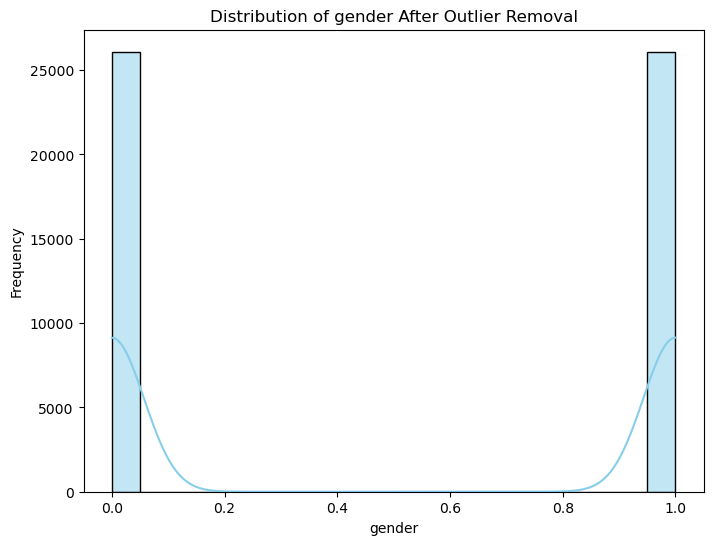

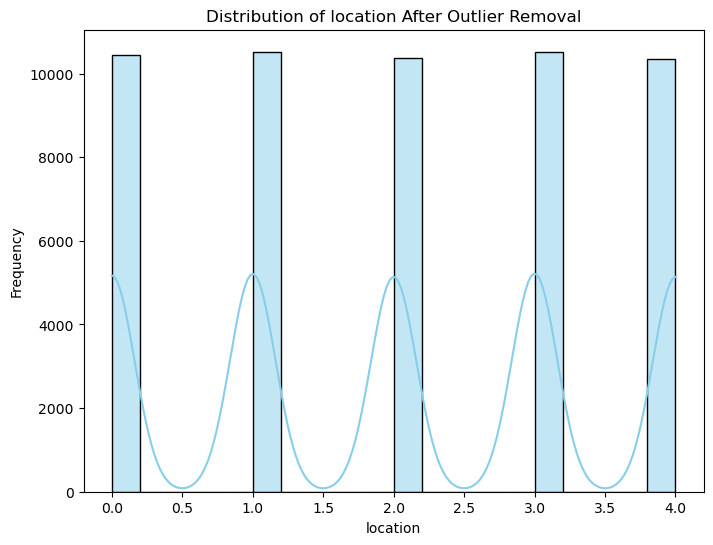

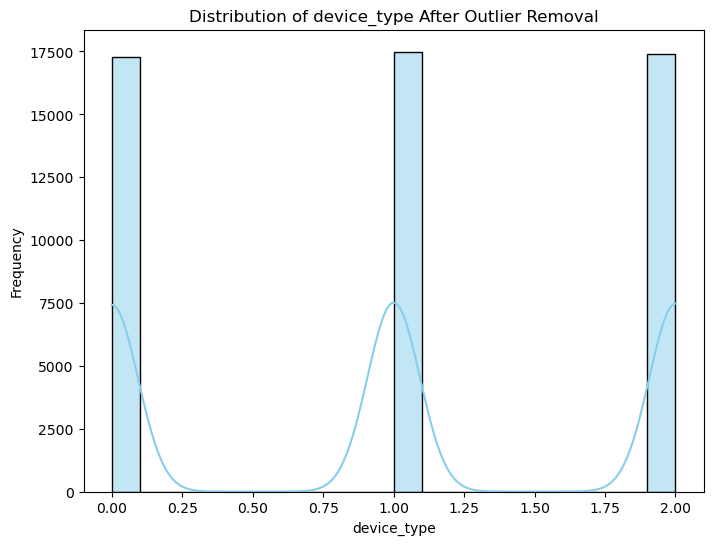

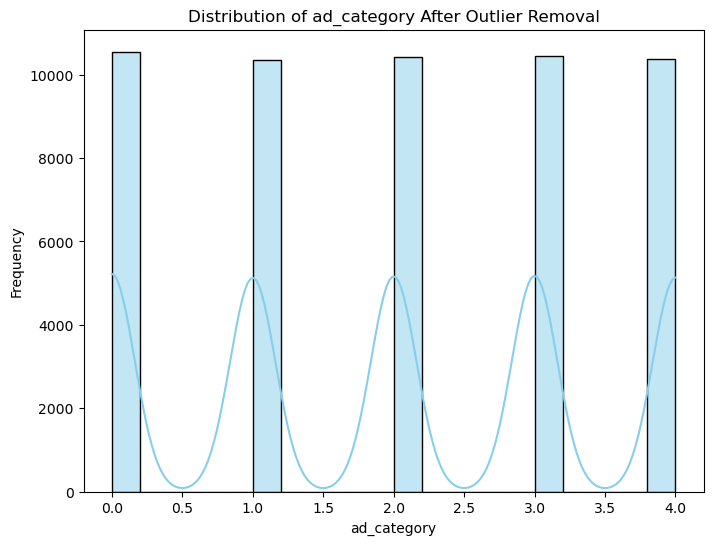

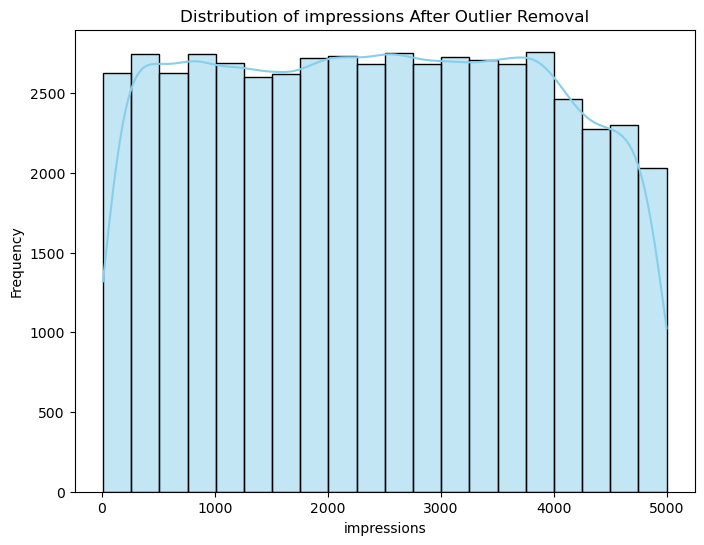

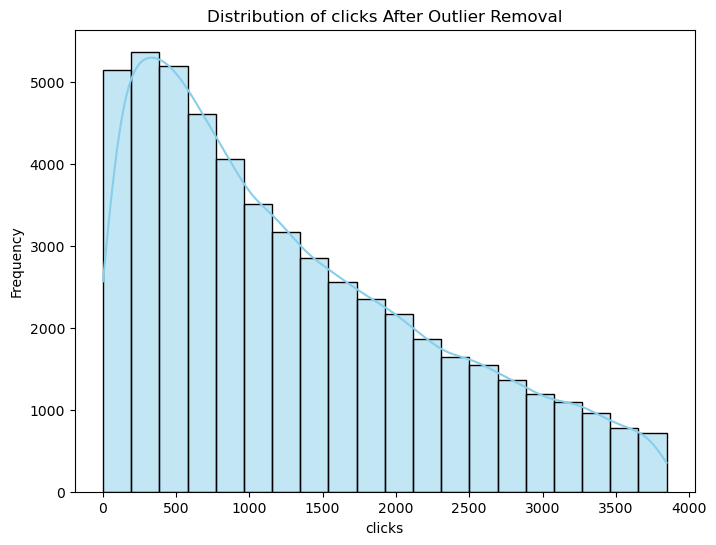

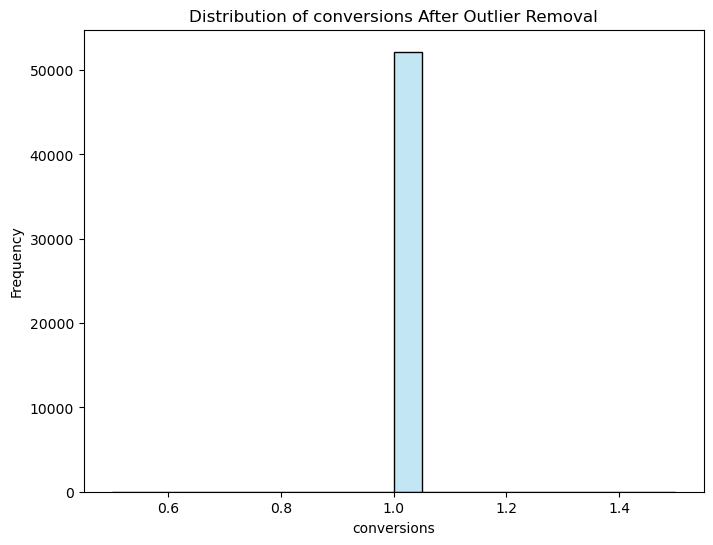

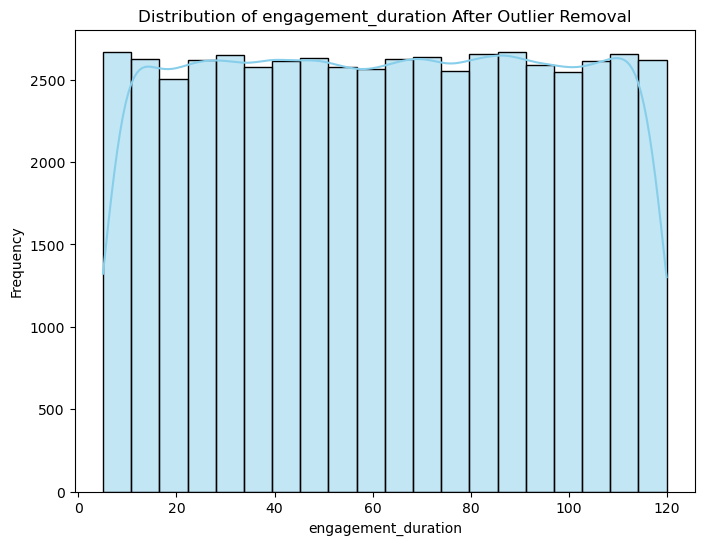

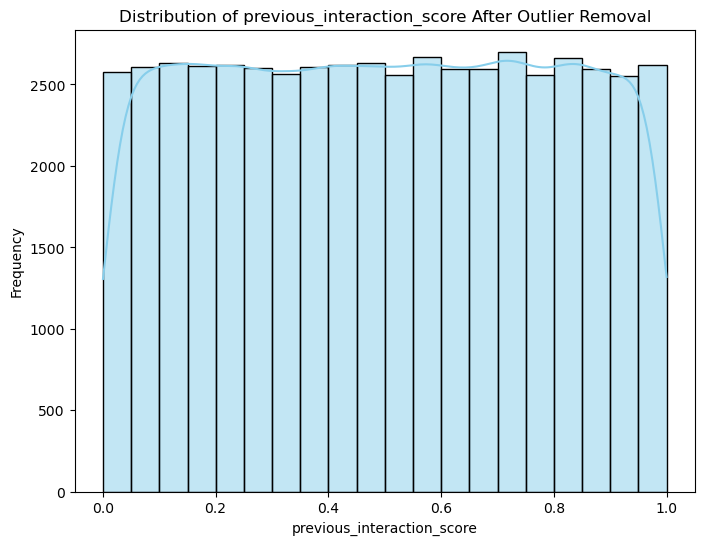

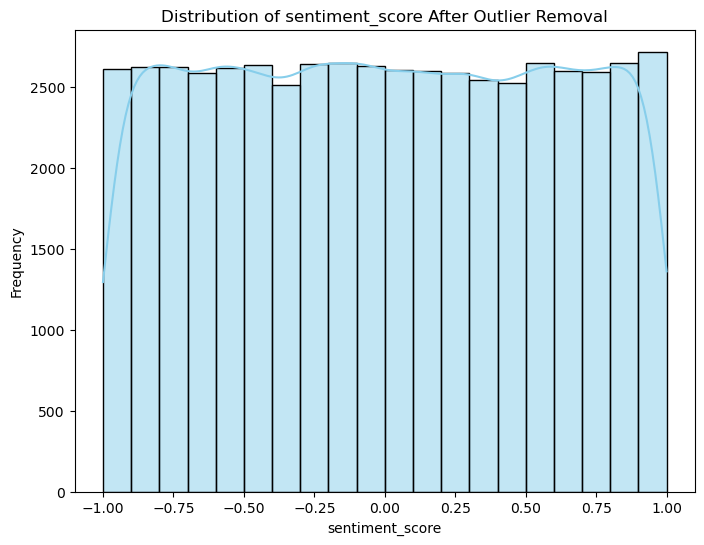

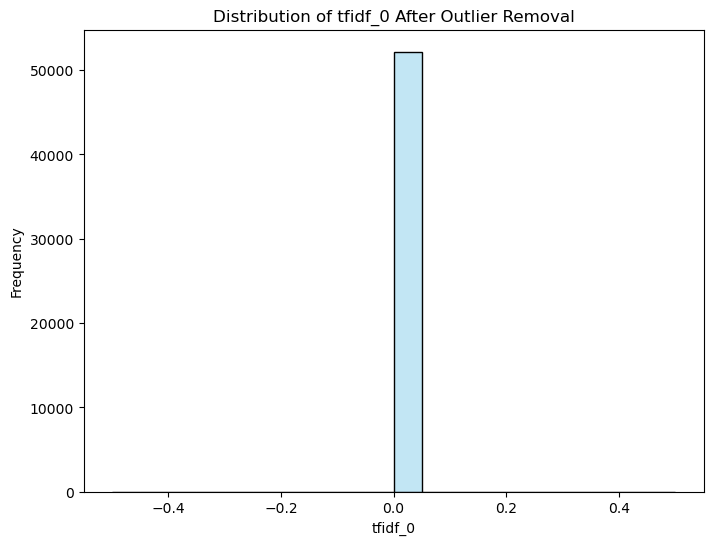

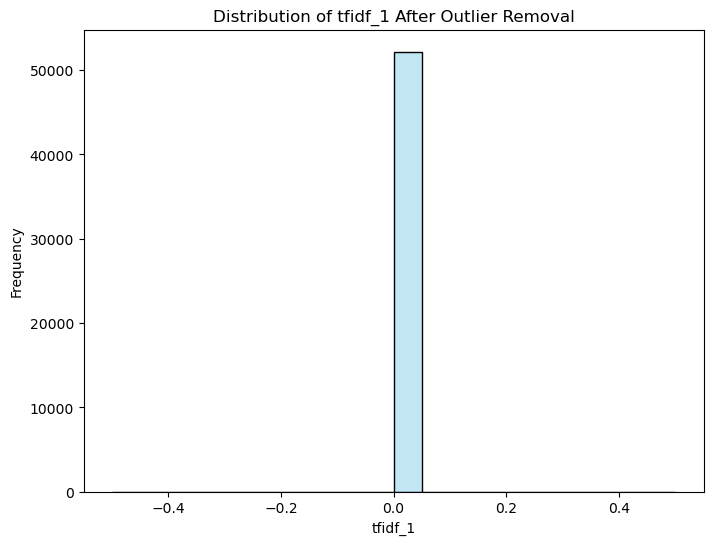

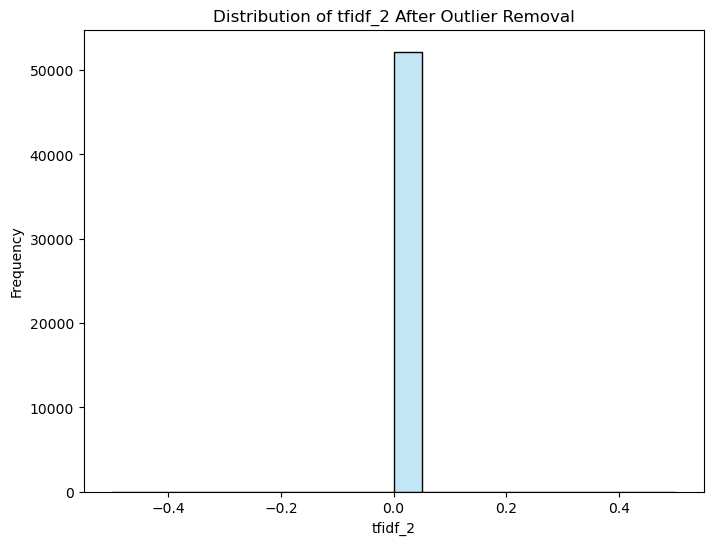

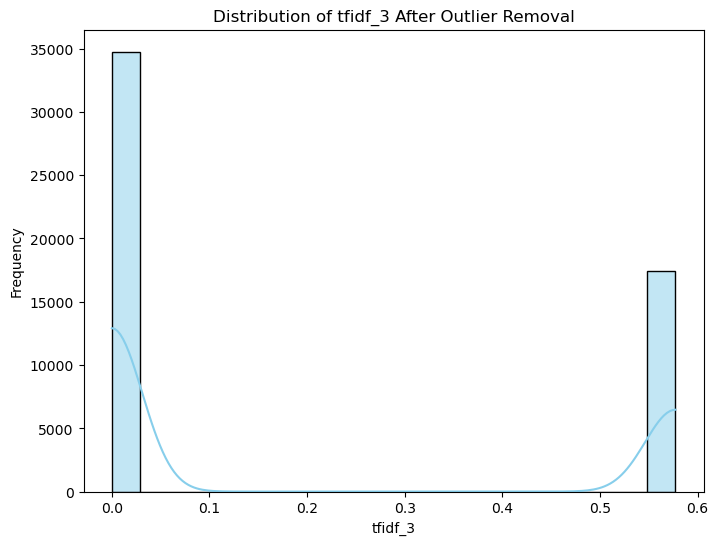

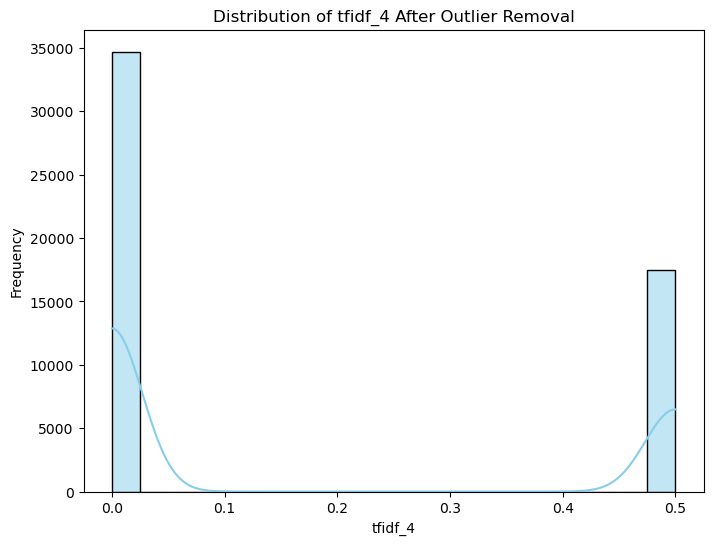

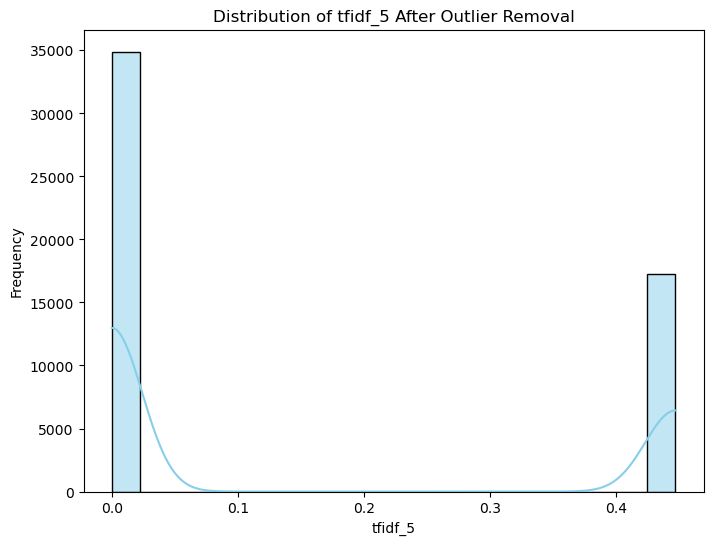

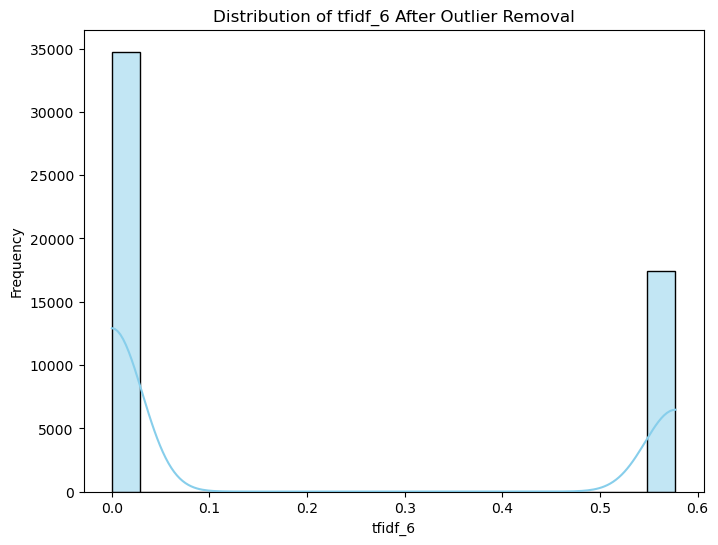

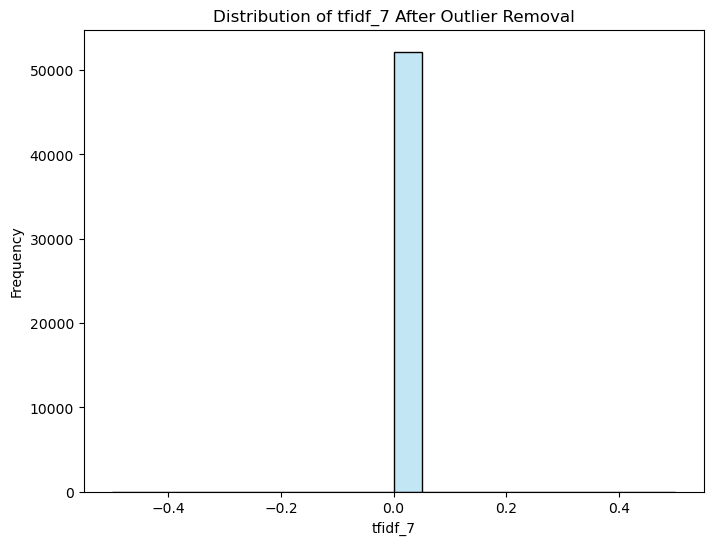

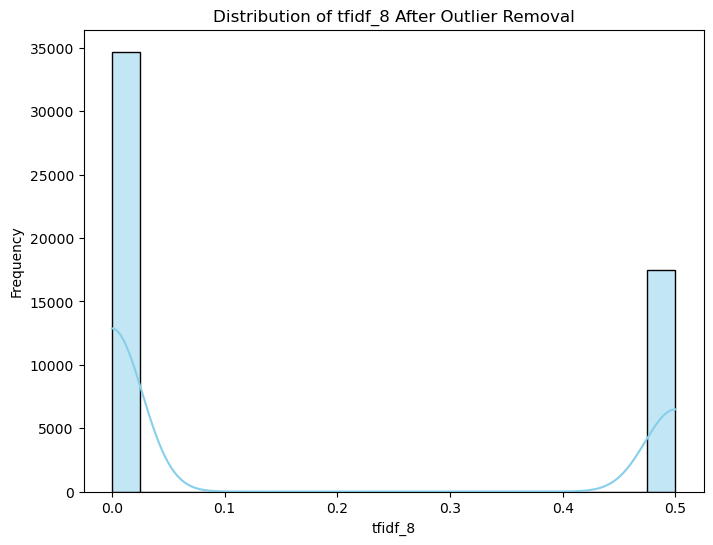

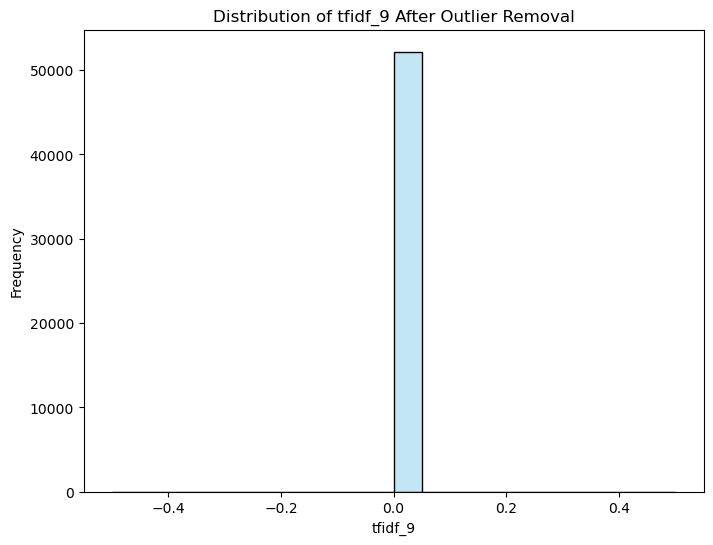

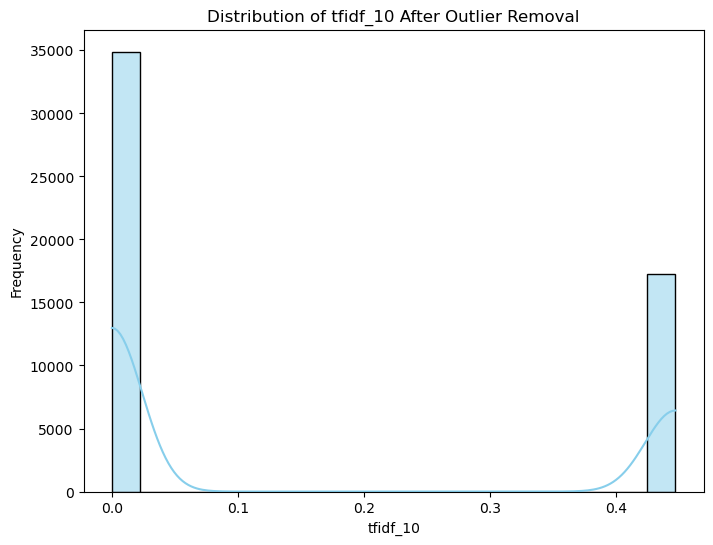

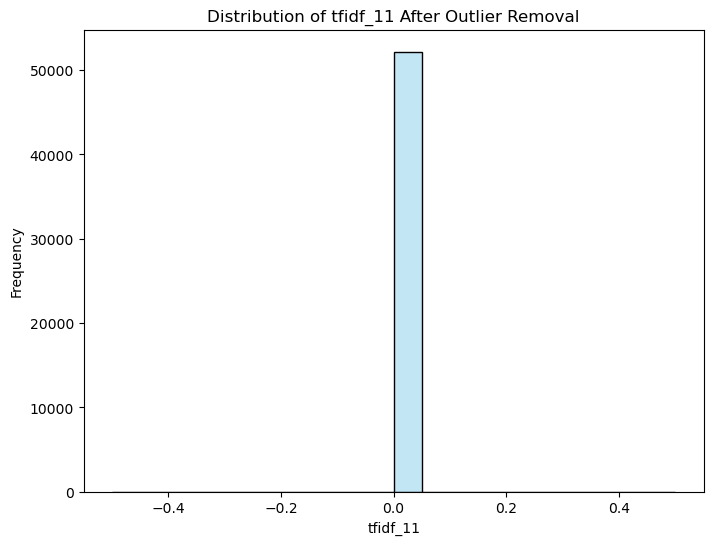

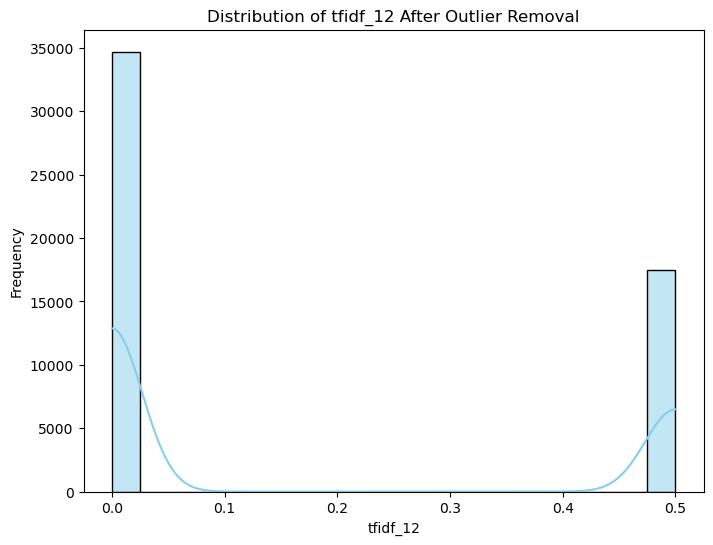

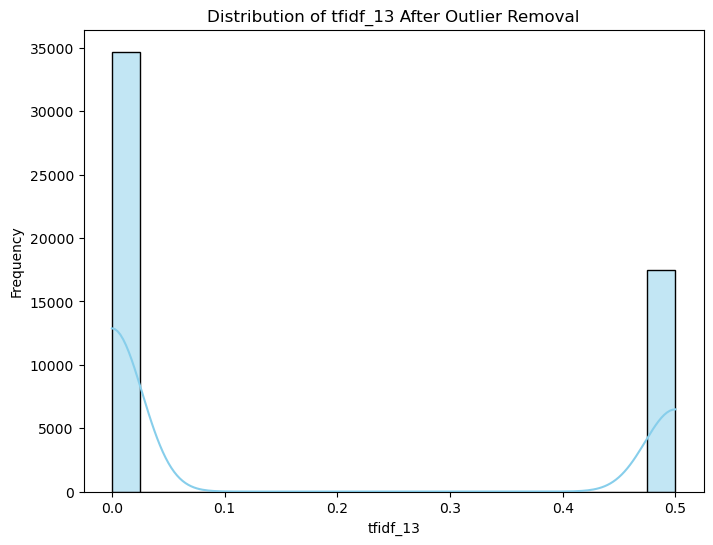

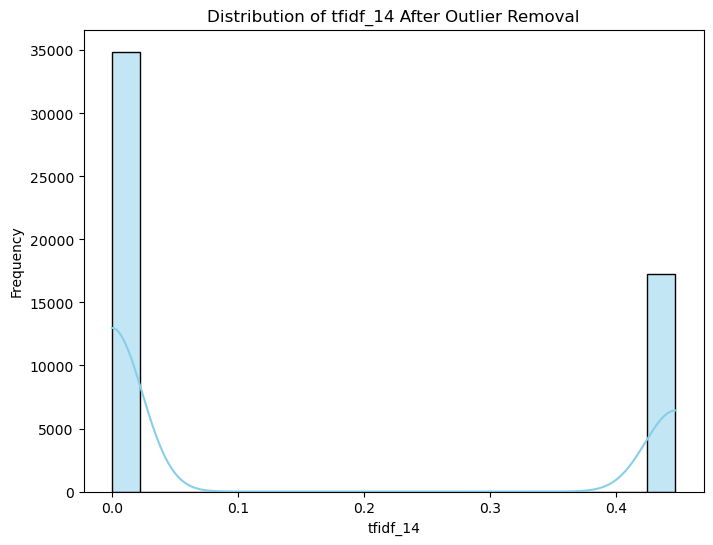

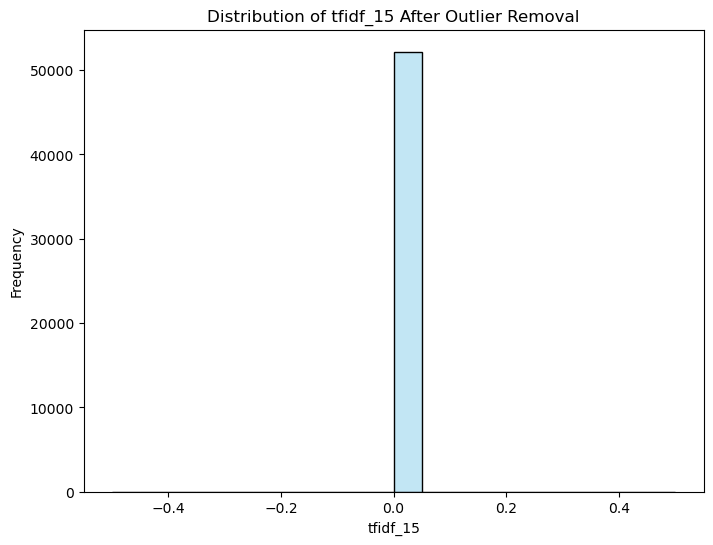

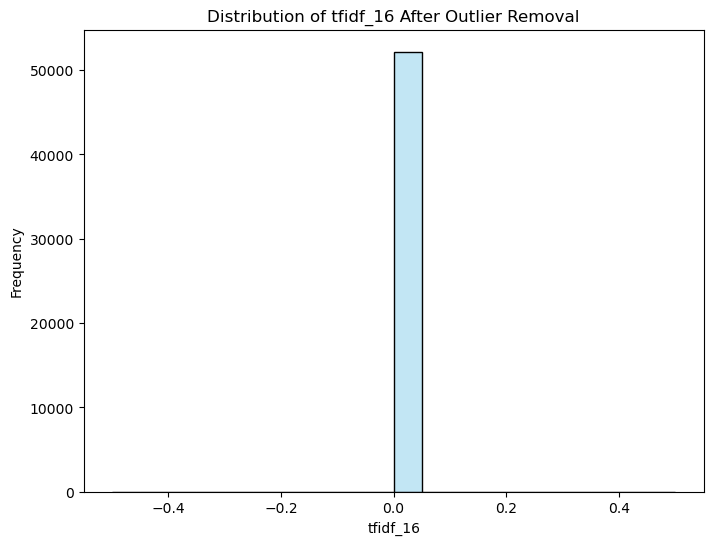

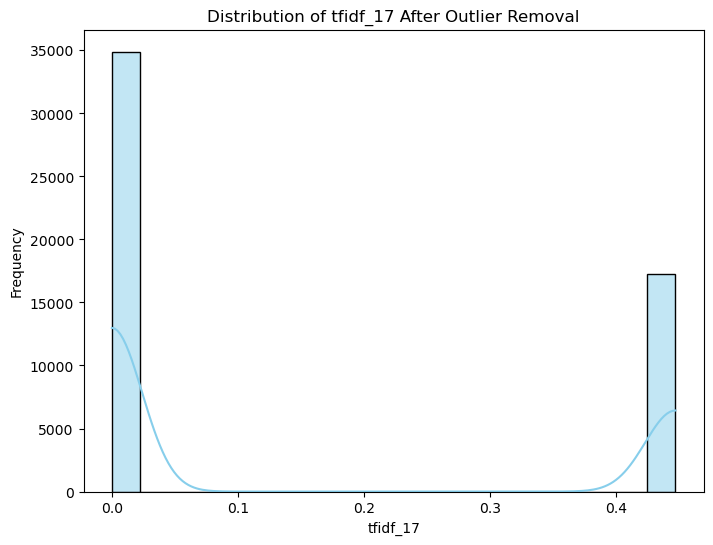

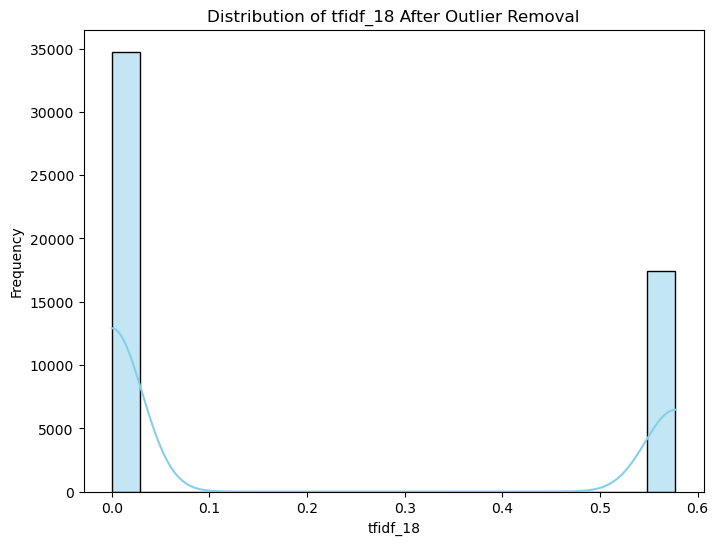

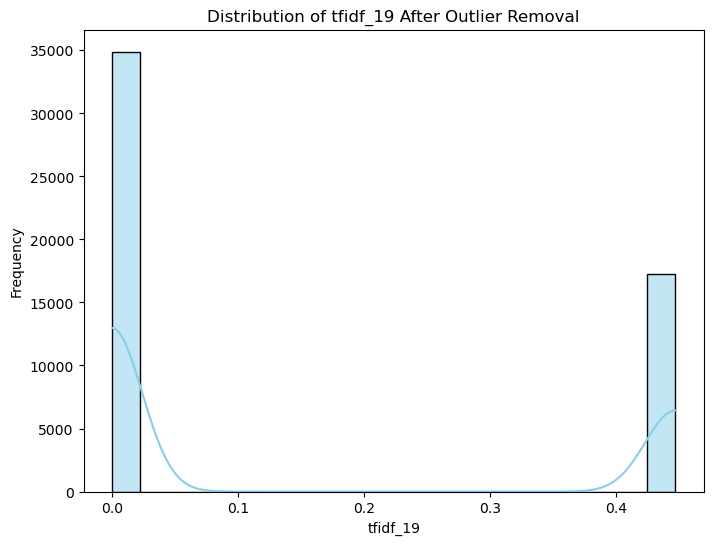

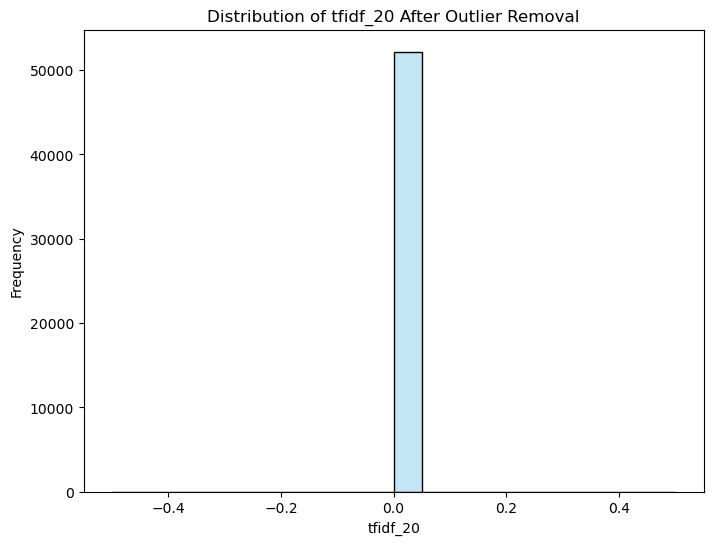

In [17]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

df_cleaned = df.dropna()  # Drop rows with missing values for simplicity

df_cleaned.show(5)

# Visualizing the distribution of numerical columns
numeric_cols = [c for c, t in df_cleaned.dtypes if t in ['int', 'double']]

for col_name in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned.select(col(col_name)).toPandas()[col_name], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()

# Handling outliers with boxplot visualization
for col_name in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_cleaned.select(col(col_name)).toPandas()[col_name], color='skyblue')
    plt.title(f'Boxplot of {col_name}')
    plt.xlabel(col_name)
    plt.show()

# Handling outliers by removing extreme values (using 1.5*IQR rule)
for col_name in numeric_cols:
    Q1 = df_cleaned.approxQuantile(col_name, [0.25], 0.05)[0]
    Q3 = df_cleaned.approxQuantile(col_name, [0.75], 0.05)[0]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned.filter((df_cleaned[col_name] >= lower_bound) & (df_cleaned[col_name] <= upper_bound))

df_cleaned.show(5)

# Visualizing the cleaned data distribution after removing outliers
for col_name in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned.select(col(col_name)).toPandas()[col_name], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {col_name} After Outlier Removal')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()


In [19]:
df_cleaned.columns


['user_id',
 'age',
 'gender',
 'location',
 'device_type',
 'ad_id',
 'ad_category',
 'impressions',
 'clicks',
 'conversions',
 'engagement_duration',
 'interaction_timestamps',
 'previous_interaction_score',
 'sentiment_score',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20']

In [20]:

#layer 3
from pyspark.sql import functions as F
from pyspark.sql.functions import unix_timestamp, dayofweek, month, year

df_cleaned = df_cleaned.withColumn("interaction_date", unix_timestamp("interaction_timestamps", "yyyy-MM-dd").cast("timestamp"))
df_cleaned = df_cleaned.withColumn("day_of_week", dayofweek("interaction_date"))
df_cleaned = df_cleaned.withColumn("month", month("interaction_date"))
df_cleaned = df_cleaned.withColumn("year", year("interaction_date"))

df_cleaned.show(5)


+-------+---+------+--------+-----------+------+-----------+-----------+------+-----------+-------------------+----------------------+--------------------------+-------------------+-------+-------+-------+------------------+-------+------------------+------------------+-------+-------+-------+------------------+--------+--------+--------+------------------+--------+--------+------------------+------------------+------------------+--------+-------------------+-----------+-----+----+
|user_id|age|gender|location|device_type| ad_id|ad_category|impressions|clicks|conversions|engagement_duration|interaction_timestamps|previous_interaction_score|    sentiment_score|tfidf_0|tfidf_1|tfidf_2|           tfidf_3|tfidf_4|           tfidf_5|           tfidf_6|tfidf_7|tfidf_8|tfidf_9|          tfidf_10|tfidf_11|tfidf_12|tfidf_13|          tfidf_14|tfidf_15|tfidf_16|          tfidf_17|          tfidf_18|          tfidf_19|tfidf_20|   interaction_date|day_of_week|month|year|
+-------+---+------+------

In [21]:
#layer 4
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# StringIndexer for categorical variables
indexers = [
    StringIndexer(inputCol="gender", outputCol="gender_index"),
    StringIndexer(inputCol="location", outputCol="location_index"),
    StringIndexer(inputCol="device_type", outputCol="device_type_index"),
    StringIndexer(inputCol="ad_category", outputCol="ad_category_index")
]

# OneHotEncoder for the indexed categorical columns
encoders = [
    OneHotEncoder(inputCol="gender_index", outputCol="gender_onehot"),
    OneHotEncoder(inputCol="location_index", outputCol="location_onehot"),
    OneHotEncoder(inputCol="device_type_index", outputCol="device_type_onehot"),
    OneHotEncoder(inputCol="ad_category_index", outputCol="ad_category_onehot")
]

# Combine indexers and encoders into a pipeline
pipeline = Pipeline(stages=indexers + encoders)

# Fit and transform the data
df_encoded = pipeline.fit(df_cleaned).transform(df_cleaned)

df_encoded.show(5)


+-------+---+------+--------+-----------+------+-----------+-----------+------+-----------+-------------------+----------------------+--------------------------+-------------------+-------+-------+-------+------------------+-------+------------------+------------------+-------+-------+-------+------------------+--------+--------+--------+------------------+--------+--------+------------------+------------------+------------------+--------+-------------------+-----------+-----+----+------------+--------------+-----------------+-----------------+-------------+---------------+------------------+------------------+
|user_id|age|gender|location|device_type| ad_id|ad_category|impressions|clicks|conversions|engagement_duration|interaction_timestamps|previous_interaction_score|    sentiment_score|tfidf_0|tfidf_1|tfidf_2|           tfidf_3|tfidf_4|           tfidf_5|           tfidf_6|tfidf_7|tfidf_8|tfidf_9|          tfidf_10|tfidf_11|tfidf_12|tfidf_13|          tfidf_14|tfidf_15|tfidf_16|    

+--------------------+
|     scaled_features|
+--------------------+
|[3.32214435322350...|
|[4.35570037422637...|
|[3.46979521336677...|
|[2.65771548257880...|
|[2.51006462243553...|
+--------------------+
only showing top 5 rows



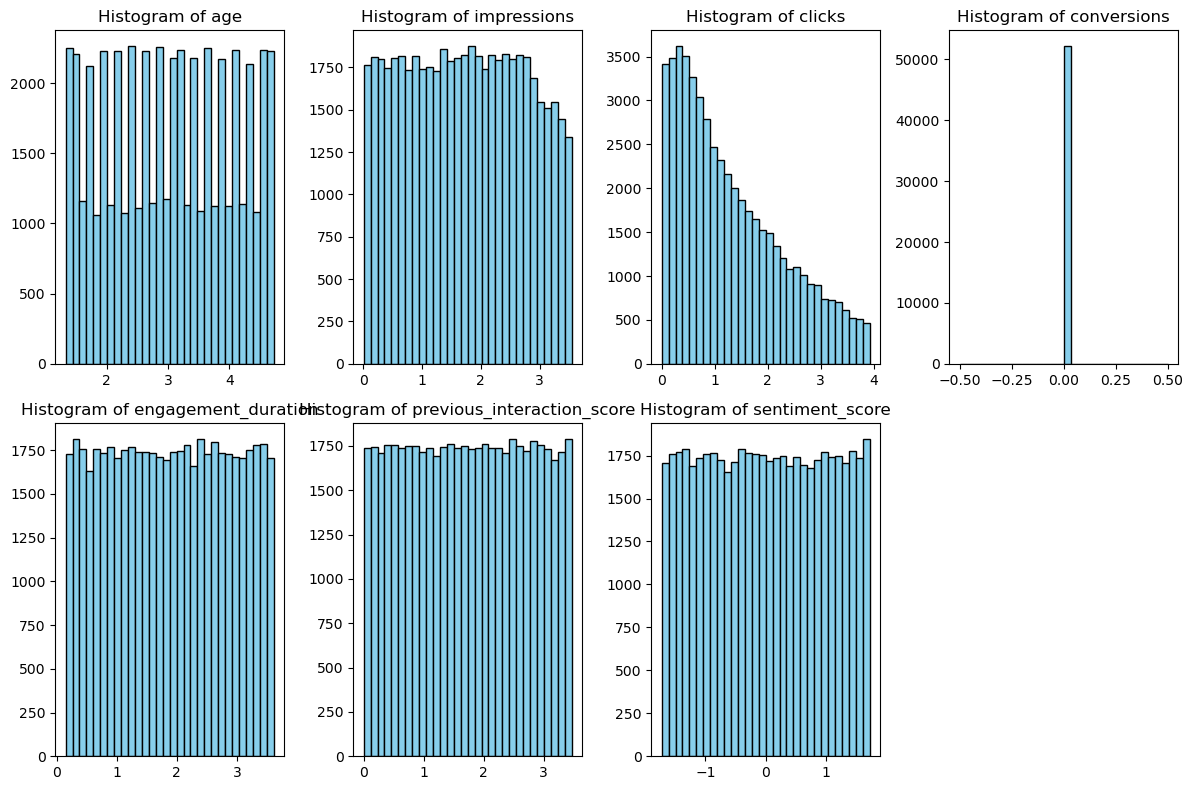

In [23]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = ['age', 'impressions', 'clicks', 'conversions', 'engagement_duration', 
                'previous_interaction_score', 'sentiment_score']

from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")

scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

pipeline = Pipeline(stages=[assembler, scaler])

df_scaled = pipeline.fit(df_encoded).transform(df_encoded)

df_scaled.select("scaled_features").show(5)

scaled_data = df_scaled.select("scaled_features").toPandas()

scaled_array = np.array(scaled_data['scaled_features'].apply(lambda x: x.toArray()).to_list())

plt.figure(figsize=(12, 8))
for i in range(scaled_array.shape[1]):
    plt.subplot(2, 4, i + 1)
    plt.hist(scaled_array[:, i], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {numeric_cols[i]}')
plt.tight_layout()
plt.show()


+--------------------+
|        pca_features|
+--------------------+
|[-2737.8237326527...|
|[-3407.9414145456...|
|[-688.48146947827...|
|[-4041.2282733475...|
|[-2154.2942558592...|
+--------------------+
only showing top 5 rows



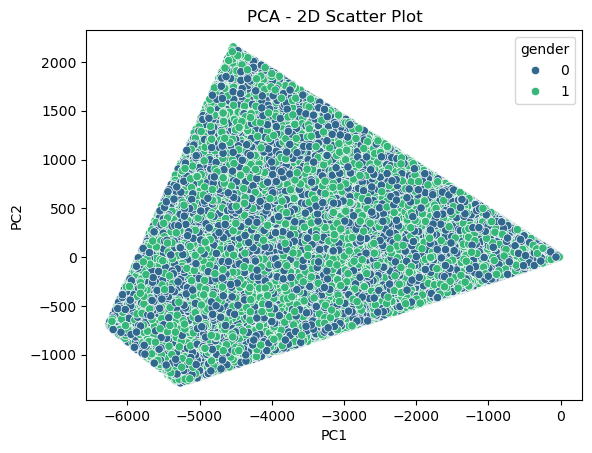

In [25]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
from pyspark.ml.feature import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

numeric_cols = ['age', 'impressions', 'clicks', 'conversions', 'engagement_duration', 
                'previous_interaction_score', 'sentiment_score']

assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")

pca = PCA(k=2, inputCol="features", outputCol="pca_features")

pipeline = Pipeline(stages=[assembler, pca])

df_pca = pipeline.fit(df_encoded).transform(df_encoded)

df_pca.select("pca_features").show(5)

pca_data = df_pca.select("pca_features").toPandas()

pca_array = np.array(pca_data['pca_features'].apply(lambda x: x.toArray()).to_list())

pca_df = pd.DataFrame(pca_array, columns=["PC1", "PC2"])

sns.scatterplot(x="PC1", y="PC2", data=pca_df, hue=df_encoded.select("gender").toPandas()["gender"], palette="viridis")
plt.title("PCA - 2D Scatter Plot")
plt.show()


In [42]:
# Load the raw dataset
df_raw = spark.read.csv('data/ad_campaign_data.csv', header=True, inferSchema=True)

# Count the total number of rows in the dataset
total_rows = df_raw.count()
print(f"Total number of rows in the raw dataset: {total_rows}")


Total number of rows in the raw dataset: 100000


In [43]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.linalg import Vectors
import pandas as pd
import numpy as np
from pyspark.ml import Pipeline
from pyspark.ml.feature import StandardScaler
from sklearn.decomposition import PCA
import os

# Layer 8: Data Splitting & Sampling

# Split the data into train and test sets
df_train, df_test = df_raw.randomSplit([0.7, 0.3], seed=42)

# Check class distribution in the training set
majority_count = df_train.filter(df_train.conversions == 0).count()
minority_count = df_train.filter(df_train.conversions == 1).count()

print(f"Majority class (conversions=0) count: {majority_count}")
print(f"Minority class (conversions=1) count: {minority_count}")

# Handle class imbalance by oversampling the minority class
# Separate majority and minority classes
df_majority = df_train.filter(df_train.conversions == 0)
df_minority = df_train.filter(df_train.conversions == 1)

# Oversample the minority class
df_minority_oversampled = df_minority.sample(withReplacement=True, fraction=majority_count / minority_count, seed=42)

# Combine majority and oversampled minority class
df_train_balanced = df_majority.union(df_minority_oversampled)

# Layer 9: Dimensionality Reduction - PCA

# Prepare feature columns (excluding non-numeric columns)
feature_cols = [col for col in df_train_balanced.columns if col not in ['user_id', 'conversions', 'interaction_timestamps', 'ad_id', 'interaction_date']]

# Use VectorAssembler to combine feature columns into a single feature vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(df_train_balanced)

# Standardize features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
df_scaled = scaler.fit(df_assembled).transform(df_assembled)

# Convert the Spark DataFrame to Pandas for PCA (since PCA in PySpark is not as flexible as in scikit-learn)
pandas_df = df_scaled.select("scaled_features", "conversions").toPandas()

# Convert the features column to a numpy array
X = np.array([vector.toArray() for vector in pandas_df['scaled_features']])
y = pandas_df['conversions'].values

# Apply PCA using sklearn
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA components
pca_columns = [f'PCA_{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca['conversions'] = y

# Layer 10: Final Data Preparation - Save processed data

# Convert the processed DataFrame back to Spark DataFrame
final_df = spark.createDataFrame(df_pca)

# Create an output directory if it doesn't exist
output_dir = 'outputs/'
os.makedirs(output_dir, exist_ok=True)

# Save the processed data to CSV in the output directory
final_df.write.option("header", "true").csv(os.path.join(output_dir, "processed_data.csv"))

print("Data processing complete and saved to 'outputs/processed_data.csv'.")


Majority class (conversions=0) count: 7158
Minority class (conversions=1) count: 62972
Data processing complete and saved to 'outputs/processed_data.csv'.
